In [3]:
# pip install seaborn

Importando as bibliotecas

In [4]:
import random
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Definindo as URL - Direetório dos arquivos csv a utilizar

In [5]:
URL_ARQUIVO = "./bancodados/202212.csv"
URL_ARQUIVO_CARACTERISTICAS_PRODUTOS = "./bancodados/caracteristicas_produtos_saude_suplementar.csv"
URL_ARQUIVO_HISTORICO = "./bancodados/HISTORICO_PLANOS.csv"
URL_ARQUIVO_GEOGRAFICO = "./bancodados/geografia.csv"
URL_ARQUIVO_LAT_LONG = "./bancodados/latitude-longitude-cidades.csv"
DATA_BASE = 2023

Abrindo o arquivo '202212.csv' com os dados de venda do plano de Saúde

E exibindo a tabela com todos os dados existentes, amostra de aproximadamente 50%

In [6]:
tabela_vendas = pd.read_csv(URL_ARQUIVO, delimiter=';', skiprows=lambda x: x > 0 and random.random() >= 0.05).dropna()
tabela_vendas['VCM'] = tabela_vendas['VCM'].str.replace(',', '.').astype(float)
tabela_vendas

,CD_MUNICIPIO,ID_PLANO,CD_FAIXA_ETARIA,VCM
0,110001,1329163,1,225.51
1,110001,1329193,2,922.58
2,110001,1329581,10,3156.91
3,110001,1329591,3,416.76
4,110001,1329696,7,1897.85
...,...,...,...,...
3994178,530010,18585372,7,4488.15
3994179,530010,18585382,6,843.38
3994180,530010,18585392,2,325.04
3994181,530010,18585392,5,480.98


Pegando o histórico de planos

In [7]:
tabela_historico = pd.read_csv(URL_ARQUIVO_HISTORICO, sep=",", low_memory=False)

tabela_historico_simplificado = tabela_historico[['ID_PLANO', 'DT_FIM_STATUS', 'DE_SITUACAO_PRINCIPAL']]

tabela_historico_simplificado

,ID_PLANO,DT_FIM_STATUS,DE_SITUACAO_PRINCIPAL
0,1324729,11/10/2006,ATIVO
1,1324729,NaN,CANCELADO
2,1324732,11/10/2006,ATIVO
3,1324732,NaN,CANCELADO
4,1324735,11/10/2006,ATIVO
...,...,...,...
315998,18684568,NaN,ATIVO
315999,18684579,NaN,ATIVO
316000,18684589,NaN,ATIVO
316001,18684599,NaN,ATIVO


Filtrar apenas planos ativos

In [8]:
tabela_merge_historico = pd.merge(tabela_vendas, tabela_historico_simplificado, how='left', on='ID_PLANO').dropna()

tabela_merge_historico = tabela_merge_historico[tabela_merge_historico['DE_SITUACAO_PRINCIPAL'] == 'ATIVO']

tabela_merge_historico = tabela_merge_historico[tabela_merge_historico['DT_FIM_STATUS'].str.slice(6).astype(int) < DATA_BASE]

tabela_merge_historico

,CD_MUNICIPIO,ID_PLANO,CD_FAIXA_ETARIA,VCM,DT_FIM_STATUS,DE_SITUACAO_PRINCIPAL
9,110001,1332117,4,393.91,05/07/2019,ATIVO
12,110001,1332119,5,434.55,05/07/2019,ATIVO
15,110001,1332121,1,341.58,05/07/2019,ATIVO
18,110001,1332121,9,978.42,05/07/2019,ATIVO
36,110001,1332455,9,790.20,05/07/2019,ATIVO
...,...,...,...,...,...,...
7773769,530010,18168848,2,789.10,30/06/2022,ATIVO
7773772,530010,18168848,5,1213.01,30/06/2022,ATIVO
7773794,530010,18215413,2,968.07,26/08/2022,ATIVO
7773797,530010,18215413,3,1144.06,26/08/2022,ATIVO


Verificando algumas informações antes das analise graficas

In [9]:
faixa = {
    1: '00 (zero) a 18 (dezoito) anos',
    2:  '19 (dezenove) a 23 (vinte e três) anos',
    3:  '24 (vinte e quatro) a 28 (vinte e oito) anos',
    4: '29 (vinte e nove) a 33 (trinta e três) anos',
    5:  '34 (trinta e quatro) a 38 (trinta e oito) anos',
    6:  '39 (trinta e nove) a 43 (quarenta e três) anos',
    7:  '44 (quarenta e quatro) a 48 (quarenta e oito) anos',
    8:  '49 (quarenta e nove) a 53 (cinquenta e três) anos',
    9:  '54 (cinquenta e quatro) a 58 (cinquenta e oito) anos',
    10:  '59 (cinquenta e nove) anos ou mais'
    }
planos = tabela_vendas['ID_PLANO'].unique()

valor_mensalidade_total = tabela_vendas['VCM'].sum()

numero_total_adesao = tabela_vendas['VCM'].count()

media_valor_mensalidade = valor_mensalidade_total / numero_total_adesao

faixa_etaria_total = tabela_vendas['CD_FAIXA_ETARIA'].sum()

media_faixa_etaria = faixa_etaria_total / numero_total_adesao

print(f'Até o ano de {DATA_BASE - 1} há {len(planos)} planos ativos no Brasil')
print(f'O valor medio mensal paga é de {media_valor_mensalidade:.2f}')
print(f'O valor medio das idades é de {media_faixa_etaria:.2f}')
for k, v in faixa.items():
    print(f'{k}: {v}')


Até o ano de 2022 há 15012 planos ativos no Brasil
O valor medio mensal paga é de 1170.36
O valor medio das idades é de 5.50
1: 00 (zero) a 18 (dezoito) anos
2: 19 (dezenove) a 23 (vinte e três) anos
3: 24 (vinte e quatro) a 28 (vinte e oito) anos
4: 29 (vinte e nove) a 33 (trinta e três) anos
5: 34 (trinta e quatro) a 38 (trinta e oito) anos
6: 39 (trinta e nove) a 43 (quarenta e três) anos
7: 44 (quarenta e quatro) a 48 (quarenta e oito) anos
8: 49 (quarenta e nove) a 53 (cinquenta e três) anos
9: 54 (cinquenta e quatro) a 58 (cinquenta e oito) anos
10: 59 (cinquenta e nove) anos ou mais


Abrindo o banco de dados gerografico, utilizado para indicar o 'CD_MUNICIPIO' na tabela de vendas

In [10]:
tabela_geografica = pd.read_csv(URL_ARQUIVO_GEOGRAFICO, sep=";")

tabela_geografica_simplificada = tabela_geografica[['CD_MUNICIPIO', 'NM_MUNICIPIO', 'SG_UF', 'NM_REGIAO']]

tabela_geografica_simplificada

,CD_MUNICIPIO,NM_MUNICIPIO,SG_UF,NM_REGIAO
0,330360,Paracambi,RJ,Sudeste
1,330370,Paraíba do Sul,RJ,Sudeste
2,330380,Paraty,RJ,Sudeste
3,315210,Ponte Nova,MG,Sudeste
4,315213,Ponto Chique,MG,Sudeste
...,...,...,...,...
5565,421265,Pescaria Brava,SC,Sul
5566,150475,Mojuí dos Campos,PA,Norte
5567,422000,Balneário Rincão,SC,Sul
5568,431454,Pinto Bandeira,RS,Sul


Realizando a junção dos dois bancos de dados através do 'CD_MUNICIPIO'

In [11]:
tabela_merge = pd.merge(tabela_merge_historico, tabela_geografica_simplificada, how='inner', on='CD_MUNICIPIO')

tabela_merge

,CD_MUNICIPIO,ID_PLANO,CD_FAIXA_ETARIA,VCM,DT_FIM_STATUS,DE_SITUACAO_PRINCIPAL,NM_MUNICIPIO,SG_UF,NM_REGIAO
0,110001,1332117,4,393.91,05/07/2019,ATIVO,Alta Floresta D'Oeste,RO,Norte
1,110001,1332119,5,434.55,05/07/2019,ATIVO,Alta Floresta D'Oeste,RO,Norte
2,110001,1332121,1,341.58,05/07/2019,ATIVO,Alta Floresta D'Oeste,RO,Norte
3,110001,1332121,9,978.42,05/07/2019,ATIVO,Alta Floresta D'Oeste,RO,Norte
4,110001,1332455,9,790.20,05/07/2019,ATIVO,Alta Floresta D'Oeste,RO,Norte
...,...,...,...,...,...,...,...,...,...
1517793,530010,18168848,2,789.10,30/06/2022,ATIVO,Brasília,DF,Centro-Oeste
1517794,530010,18168848,5,1213.01,30/06/2022,ATIVO,Brasília,DF,Centro-Oeste
1517795,530010,18215413,2,968.07,26/08/2022,ATIVO,Brasília,DF,Centro-Oeste
1517796,530010,18215413,3,1144.06,26/08/2022,ATIVO,Brasília,DF,Centro-Oeste


*Descrisão da tabela*


In [12]:
tabela_merge.info()

tabela_merge.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1517798 entries, 0 to 1517797
Data columns (total 9 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   CD_MUNICIPIO           1517798 non-null  int64  
 1   ID_PLANO               1517798 non-null  int64  
 2   CD_FAIXA_ETARIA        1517798 non-null  int64  
 3   VCM                    1517798 non-null  float64
 4   DT_FIM_STATUS          1517798 non-null  object 
 5   DE_SITUACAO_PRINCIPAL  1517798 non-null  object 
 6   NM_MUNICIPIO           1517798 non-null  object 
 7   SG_UF                  1517798 non-null  object 
 8   NM_REGIAO              1517798 non-null  object 
dtypes: float64(1), int64(3), object(5)
memory usage: 104.2+ MB


,CD_MUNICIPIO,ID_PLANO,CD_FAIXA_ETARIA,VCM
count,1.517798e+06,1.517798e+06,1.517798e+06,1.517798e+06
mean,3.268141e+05,1.497992e+07,5.495105e+00,1.165794e+03
std,9.649859e+04,4.606515e+06,2.870875e+00,1.054746e+03
min,1.100010e+05,1.329553e+06,1.000000e+00,2.093000e+01
25%,2.516300e+05,1.619828e+07,3.000000e+00,5.083600e+02
50%,3.152900e+05,1.634633e+07,5.000000e+00,8.382900e+02
75%,4.117600e+05,1.659624e+07,8.000000e+00,1.451390e+03
max,5.300100e+05,1.849861e+07,1.000000e+01,1.788106e+04


Visualizando os dados da tabela - A distribuição dos planos vendidos e a distribuição dos valores de mensalidade

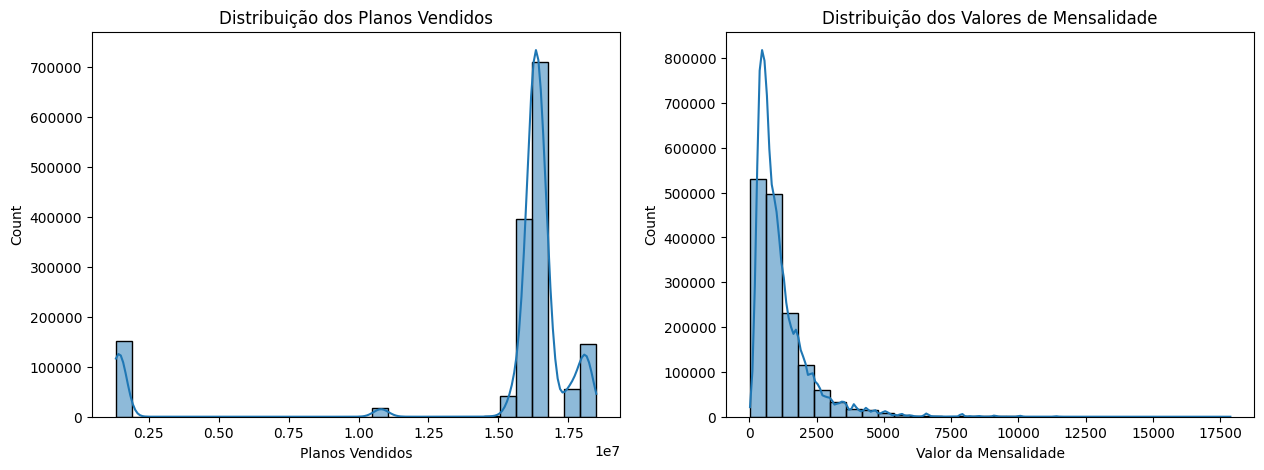

In [13]:
plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
sns.histplot(tabela_merge['ID_PLANO'], bins=30, kde=True)
plt.title('Distribuição dos Planos Vendidos')
plt.xlabel('Planos Vendidos')


plt.subplot(1, 2, 2)
sns.histplot(tabela_merge['VCM'], bins=30, kde=True)
plt.title('Distribuição dos Valores de Mensalidade')
plt.xlabel('Valor da Mensalidade')

plt.show()

Visualizando os dados da tabela - A distribuição das faixa de idade

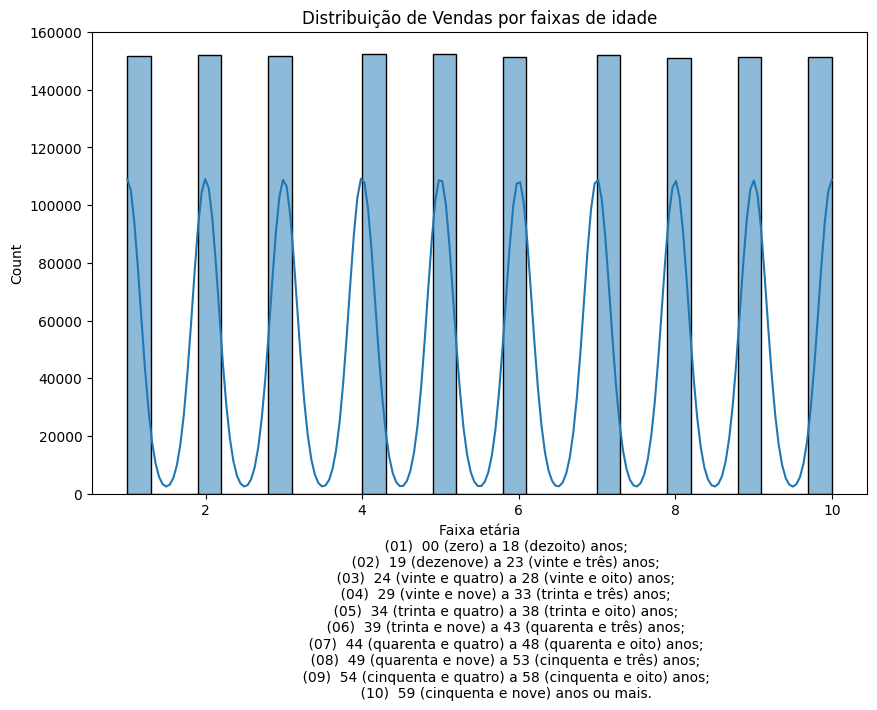

In [14]:
plt.figure(figsize=(10, 6))
sns.histplot(tabela_merge['CD_FAIXA_ETARIA'], bins=30, kde=True)
plt.title('Distribuição de Vendas por faixas de idade')
plt.xlabel("""Faixa etária
            (01)  00 (zero) a 18 (dezoito) anos;
            (02)  19 (dezenove) a 23 (vinte e três) anos;
            (03)  24 (vinte e quatro) a 28 (vinte e oito) anos;
            (04)  29 (vinte e nove) a 33 (trinta e três) anos;
            (05)  34 (trinta e quatro) a 38 (trinta e oito) anos;
            (06)  39 (trinta e nove) a 43 (quarenta e três) anos;
            (07)  44 (quarenta e quatro) a 48 (quarenta e oito) anos;
            (08)  49 (quarenta e nove) a 53 (cinquenta e três) anos;
            (09)  54 (cinquenta e quatro) a 58 (cinquenta e oito) anos;
            (10)  59 (cinquenta e nove) anos ou mais.""")
plt.show()

Visualizando os dados da tabela - A distribuição das vendas pelas regiões do Brasil e a distribuição das vendas pelos estados brasileiros

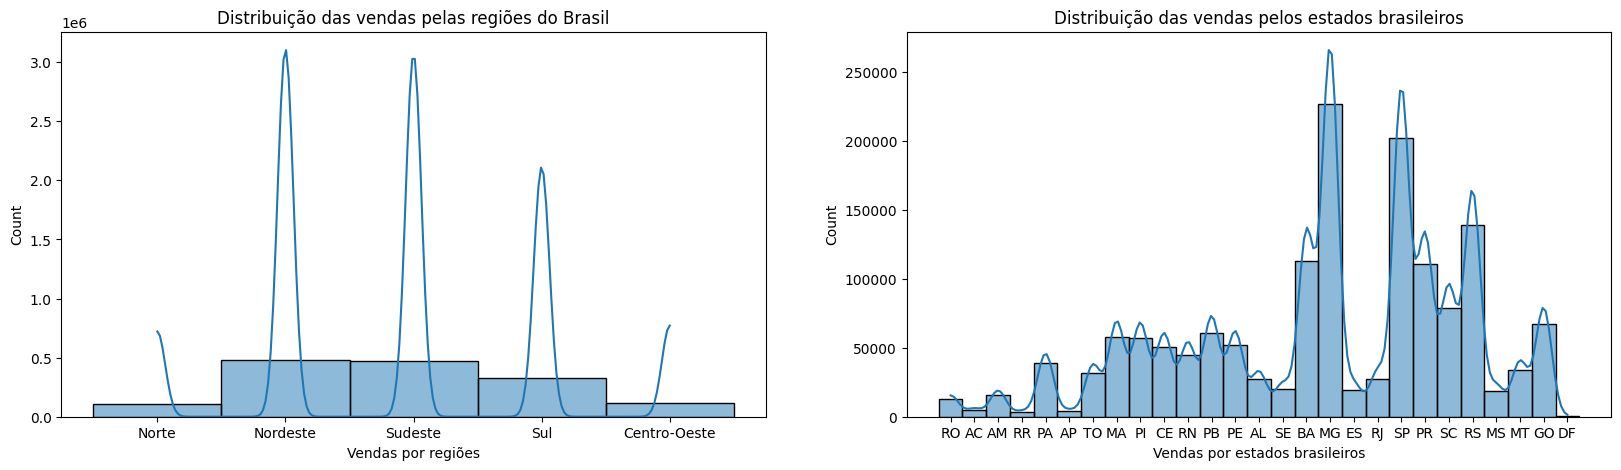

In [15]:
plt.figure(figsize=(20, 5))
plt.subplot(1, 2, 1)
sns.histplot(tabela_merge['NM_REGIAO'], bins=30, kde=True)
plt.title('Distribuição das vendas pelas regiões do Brasil')
plt.xlabel('Vendas por regiões')

plt.subplot(1, 2, 2)
sns.histplot(tabela_merge['SG_UF'], bins=30, kde=True)
plt.title('Distribuição das vendas pelos estados brasileiros')
plt.xlabel('Vendas por estados brasileiros')
plt.show()

Visualizando os dados da tabela - A distribuição das Tipo do plano x Valores da mensalidade

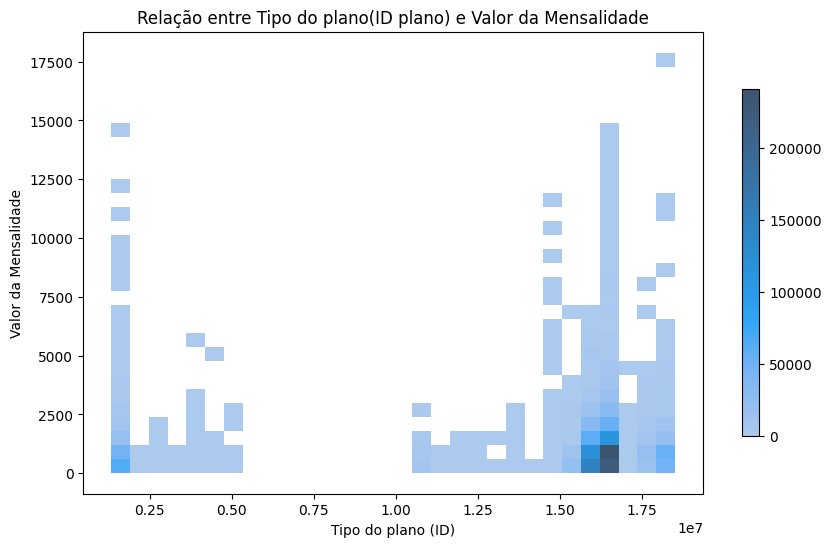

In [16]:
plt.figure(figsize=(10, 6))
sns.histplot(x='ID_PLANO', y='VCM', data=tabela_merge, bins=30, kde=True, cbar=True, cbar_kws=dict(shrink=.75))
plt.title('Relação entre Tipo do plano(ID plano) e Valor da Mensalidade')
plt.xlabel('Tipo do plano (ID)')
plt.ylabel('Valor da Mensalidade')
plt.show()

Visualizando os dados da tabela - A distribuição das Faixa etária x Tipo do plano

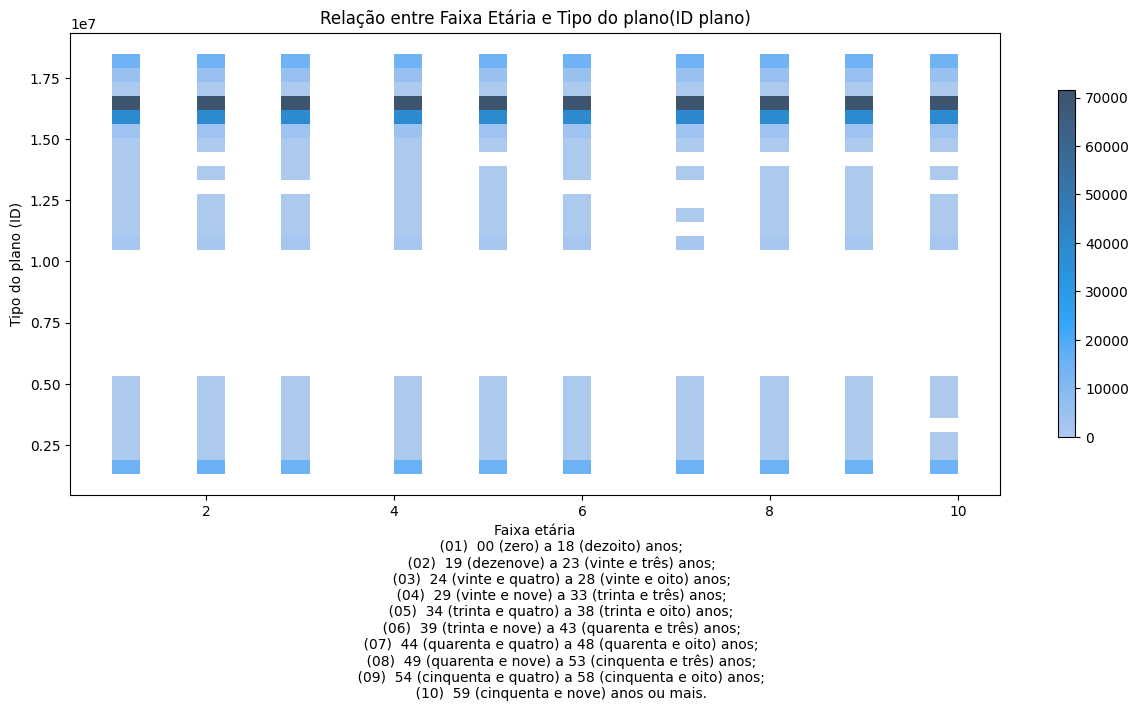

In [17]:
plt.figure(figsize=(15, 6))
sns.histplot(x='CD_FAIXA_ETARIA', y='ID_PLANO', data=tabela_merge, bins=30, kde=True, cbar=True, cbar_kws=dict(shrink=.75))
plt.title('Relação entre Faixa Etária e Tipo do plano(ID plano)')
plt.xlabel("""Faixa etária
            (01)  00 (zero) a 18 (dezoito) anos;
            (02)  19 (dezenove) a 23 (vinte e três) anos;
            (03)  24 (vinte e quatro) a 28 (vinte e oito) anos;
            (04)  29 (vinte e nove) a 33 (trinta e três) anos;
            (05)  34 (trinta e quatro) a 38 (trinta e oito) anos;
            (06)  39 (trinta e nove) a 43 (quarenta e três) anos;
            (07)  44 (quarenta e quatro) a 48 (quarenta e oito) anos;
            (08)  49 (quarenta e nove) a 53 (cinquenta e três) anos;
            (09)  54 (cinquenta e quatro) a 58 (cinquenta e oito) anos;
            (10)  59 (cinquenta e nove) anos ou mais.""")
plt.ylabel('Tipo do plano (ID)')
plt.show()

Visualizando os dados da tabela - A distribuição das Tipo do plano x Regiões brasileiras e Estados brasileiros

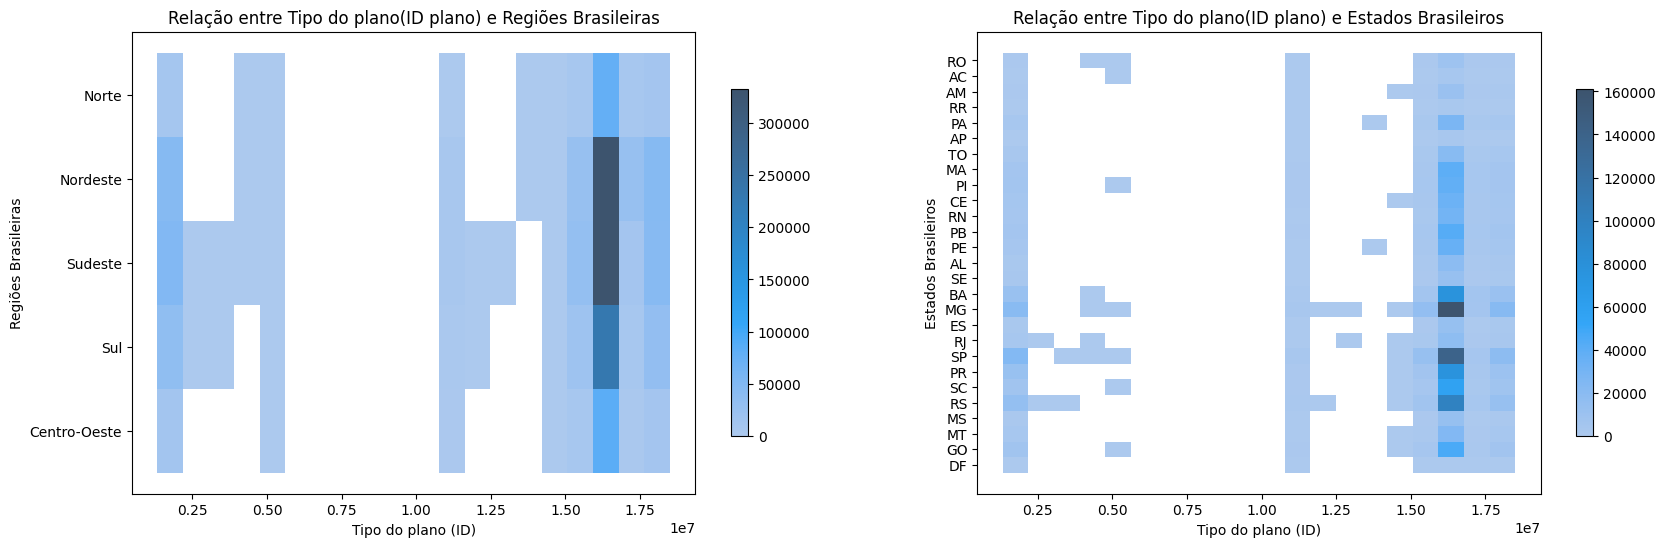

In [18]:
plt.figure(figsize=(20, 6))
plt.subplot(1, 2, 1)
sns.histplot(x='ID_PLANO', y='NM_REGIAO', data=tabela_merge, bins=20, kde=True, cbar=True, cbar_kws=dict(shrink=.75))
plt.title('Relação entre Tipo do plano(ID plano) e Regiões Brasileiras')
plt.xlabel('Tipo do plano (ID)')
plt.ylabel('Regiões Brasileiras')

plt.subplot(1, 2, 2)
sns.histplot(x='ID_PLANO', y='SG_UF', data=tabela_merge, bins=20, kde=True, cbar=True, cbar_kws=dict(shrink=.75))
plt.title('Relação entre Tipo do plano(ID plano) e Estados Brasileiros')
plt.xlabel('Tipo do plano (ID)')
plt.ylabel('Estados Brasileiros')
plt.show()

Visualizando os dados da tabela - A distribuição das Faixa etária x Valores da mensalidade

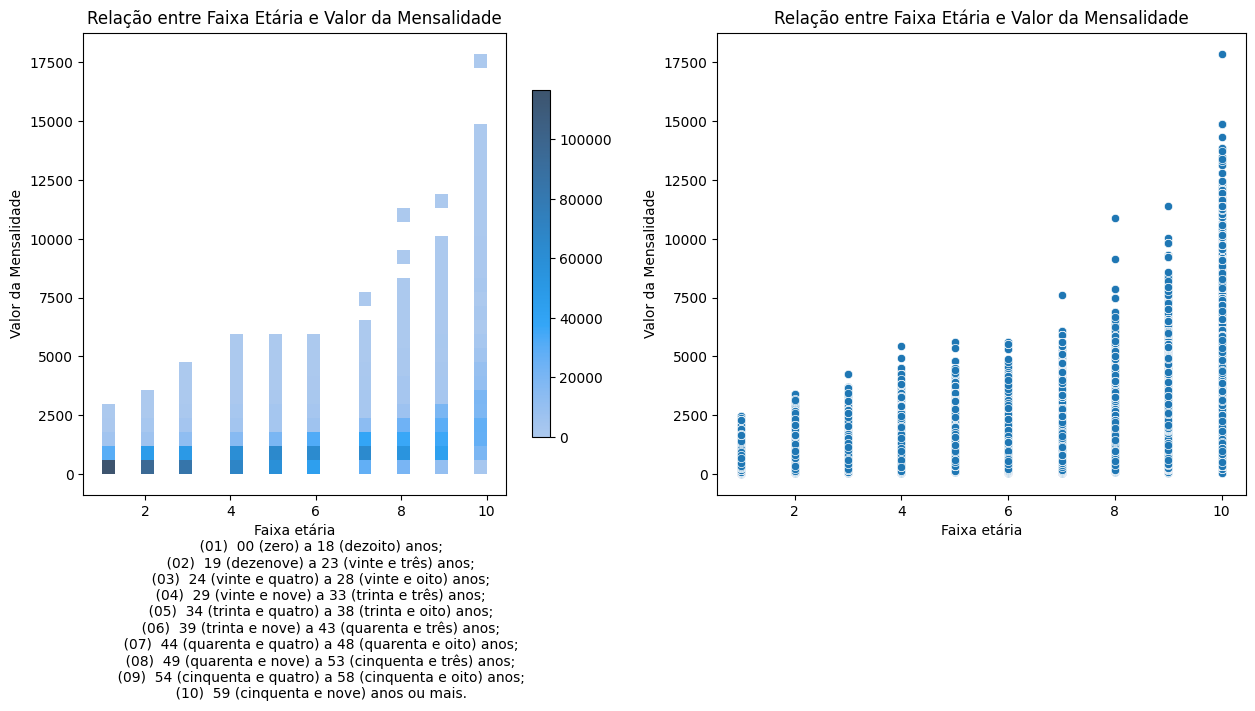

In [19]:
plt.figure(figsize=(15, 6))
plt.subplot(1, 2, 1)
sns.histplot(x='CD_FAIXA_ETARIA', y='VCM', data=tabela_merge, bins=30, kde=True, cbar=True, cbar_kws=dict(shrink=.75))
plt.title('Relação entre Faixa Etária e Valor da Mensalidade')
plt.xlabel("""Faixa etária
            (01)  00 (zero) a 18 (dezoito) anos;
            (02)  19 (dezenove) a 23 (vinte e três) anos;
            (03)  24 (vinte e quatro) a 28 (vinte e oito) anos;
            (04)  29 (vinte e nove) a 33 (trinta e três) anos;
            (05)  34 (trinta e quatro) a 38 (trinta e oito) anos;
            (06)  39 (trinta e nove) a 43 (quarenta e três) anos;
            (07)  44 (quarenta e quatro) a 48 (quarenta e oito) anos;
            (08)  49 (quarenta e nove) a 53 (cinquenta e três) anos;
            (09)  54 (cinquenta e quatro) a 58 (cinquenta e oito) anos;
            (10)  59 (cinquenta e nove) anos ou mais.""")
plt.ylabel('Valor da Mensalidade')

plt.subplot(1, 2, 2)
sns.scatterplot(x='CD_FAIXA_ETARIA', y='VCM', data=tabela_merge)
plt.title('Relação entre Faixa Etária e Valor da Mensalidade')
plt.xlabel("Faixa etária")
plt.ylabel('Valor da Mensalidade')
plt.show()

Visualizando os dados da tabela - A distribuição dos Valores da mensalidade x Regiões brasileiras

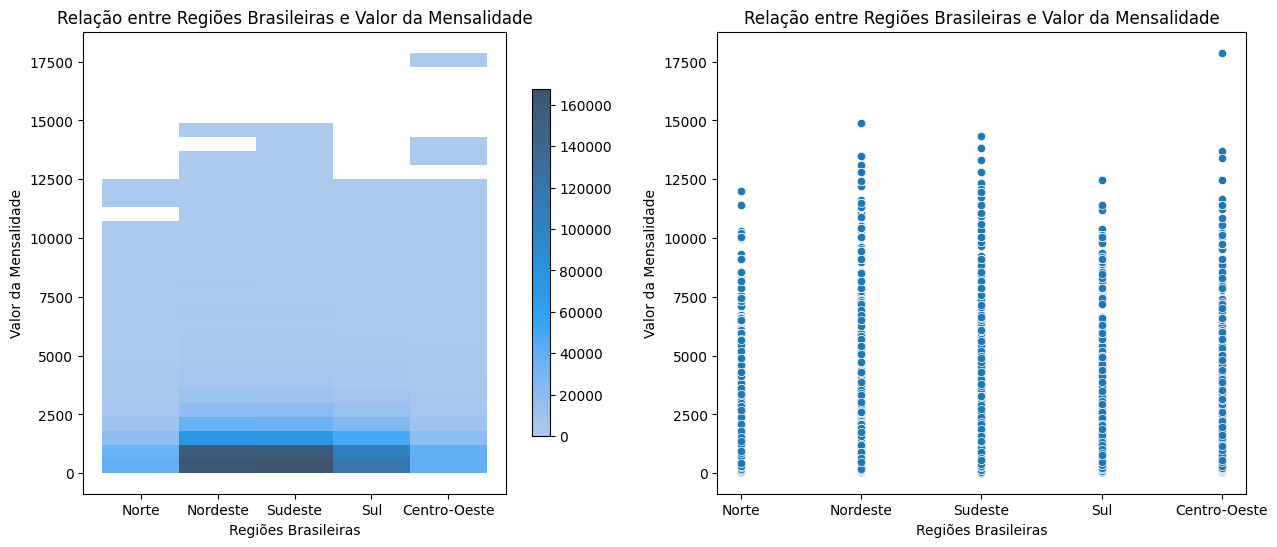

In [20]:
plt.figure(figsize=(15, 6))
plt.subplot(1, 2, 1)
sns.histplot(x='NM_REGIAO', y='VCM', data=tabela_merge, bins=30, kde=True, cbar=True, cbar_kws=dict(shrink=.75))
plt.title('Relação entre Regiões Brasileiras e Valor da Mensalidade')
plt.xlabel('Regiões Brasileiras')
plt.ylabel('Valor da Mensalidade')

plt.subplot(1, 2, 2)
sns.scatterplot(x='NM_REGIAO', y='VCM', data=tabela_merge)
plt.title('Relação entre Regiões Brasileiras e Valor da Mensalidade')
plt.xlabel('Regiões Brasileiras')
plt.ylabel('Valor da Mensalidade')
plt.show()

Visualizando os dados da tabela - A distribuição dos Valores da mensalidade x Estados barasileiro

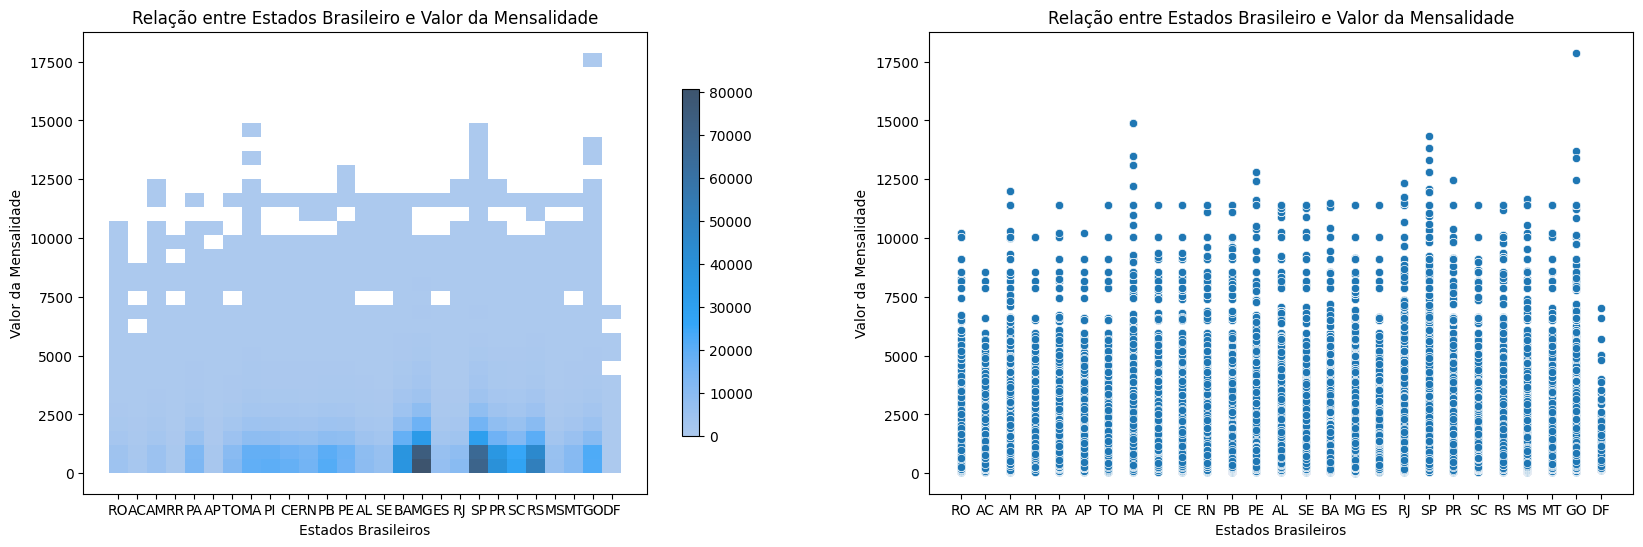

In [21]:
plt.figure(figsize=(20, 6))
plt.subplot(1, 2, 1)
sns.histplot(x='SG_UF', y='VCM', data=tabela_merge, bins=30, kde=True, cbar=True, cbar_kws=dict(shrink=.75))
plt.title('Relação entre Estados Brasileiro e Valor da Mensalidade')
plt.xlabel('Estados Brasileiros')
plt.ylabel('Valor da Mensalidade')

plt.subplot(1, 2, 2)
sns.scatterplot(x='SG_UF', y='VCM', data=tabela_merge)
plt.title('Relação entre Estados Brasileiro e Valor da Mensalidade')
plt.xlabel('Estados Brasileiros')
plt.ylabel('Valor da Mensalidade')
plt.show()

Visualizando os dados da tabela - A distribuição das Faixa Etária x Regiões brasileiras e Estados brasileiros

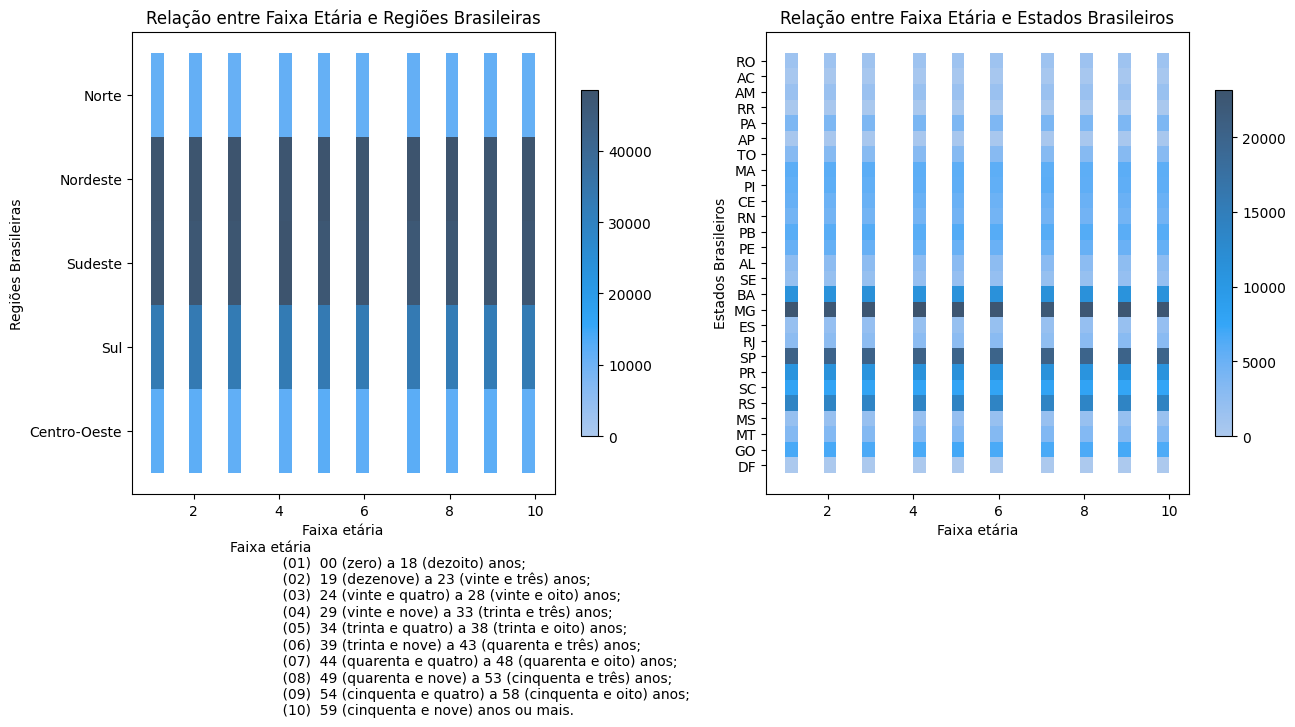

In [22]:
plt.figure(figsize=(15, 6))
plt.subplot(1, 2, 1)
sns.histplot(x='CD_FAIXA_ETARIA', y='NM_REGIAO', data=tabela_merge, bins=30, kde=True, cbar=True, cbar_kws=dict(shrink=.75))
plt.title('Relação entre Faixa Etária e Regiões Brasileiras')
plt.xlabel('Faixa etária')
plt.ylabel('Regiões Brasileiras')
plt.subplot(1, 2, 2)
sns.histplot(x='CD_FAIXA_ETARIA', y='SG_UF', data=tabela_merge, bins=30, kde=True, cbar=True, cbar_kws=dict(shrink=.75))
plt.title('Relação entre Faixa Etária e Estados Brasileiros')
plt.xlabel('Faixa etária')
plt.ylabel('Estados Brasileiros')
plt.text(-12, 42,"""Faixa etária
            (01)  00 (zero) a 18 (dezoito) anos;
            (02)  19 (dezenove) a 23 (vinte e três) anos;
            (03)  24 (vinte e quatro) a 28 (vinte e oito) anos;
            (04)  29 (vinte e nove) a 33 (trinta e três) anos;
            (05)  34 (trinta e quatro) a 38 (trinta e oito) anos;
            (06)  39 (trinta e nove) a 43 (quarenta e três) anos;
            (07)  44 (quarenta e quatro) a 48 (quarenta e oito) anos;
            (08)  49 (quarenta e nove) a 53 (cinquenta e três) anos;
            (09)  54 (cinquenta e quatro) a 58 (cinquenta e oito) anos;
            (10)  59 (cinquenta e nove) anos ou mais.""")
plt.show()

Abrindo o arquivo que contem latitudes e logitudes das cidades

In [23]:
tabela_lat_long = pd.read_csv(URL_ARQUIVO_LAT_LONG, delimiter=',')

tabela_lat_long = tabela_lat_long[['NM_MUNICIPIO', 'latitude', 'longitude']]

tabela_lat_long

,NM_MUNICIPIO,latitude,longitude
0,Abadia de Goiás,-16.75730,-49.4412
1,Abadia dos Dourados,-18.48310,-47.3916
2,Abadiânia,-16.19700,-48.7057
3,Abaeté,-19.15510,-45.4444
4,Abaetetuba,-1.72183,-48.8788
...,...,...,...
5565,Xique-Xique,-10.82300,-42.7245
5566,Zabelê,-8.07901,-37.1057
5567,Zacarias,-21.05060,-50.0552
5568,Zé Doca,-3.27014,-45.6553


Merge entre a nova tabela e a tabela com todas as informações

In [24]:
tabela_merge_lat_long = pd.merge(tabela_merge, tabela_lat_long, how='inner', on='NM_MUNICIPIO')

tabela_merge_lat_long

,CD_MUNICIPIO,ID_PLANO,CD_FAIXA_ETARIA,VCM,DT_FIM_STATUS,DE_SITUACAO_PRINCIPAL,NM_MUNICIPIO,SG_UF,NM_REGIAO,latitude,longitude
0,110001,1332117,4,393.91,05/07/2019,ATIVO,Alta Floresta D'Oeste,RO,Norte,-11.9283,-61.9953
1,110001,1332119,5,434.55,05/07/2019,ATIVO,Alta Floresta D'Oeste,RO,Norte,-11.9283,-61.9953
2,110001,1332121,1,341.58,05/07/2019,ATIVO,Alta Floresta D'Oeste,RO,Norte,-11.9283,-61.9953
3,110001,1332121,9,978.42,05/07/2019,ATIVO,Alta Floresta D'Oeste,RO,Norte,-11.9283,-61.9953
4,110001,1332455,9,790.20,05/07/2019,ATIVO,Alta Floresta D'Oeste,RO,Norte,-11.9283,-61.9953
...,...,...,...,...,...,...,...,...,...,...,...
1681974,530010,18168848,2,789.10,30/06/2022,ATIVO,Brasília,DF,Centro-Oeste,-15.7795,-47.9297
1681975,530010,18168848,5,1213.01,30/06/2022,ATIVO,Brasília,DF,Centro-Oeste,-15.7795,-47.9297
1681976,530010,18215413,2,968.07,26/08/2022,ATIVO,Brasília,DF,Centro-Oeste,-15.7795,-47.9297
1681977,530010,18215413,3,1144.06,26/08/2022,ATIVO,Brasília,DF,Centro-Oeste,-15.7795,-47.9297


Plotando a latitude e logitude com valores da mensalidade

<Axes: xlabel='longitude', ylabel='latitude'>

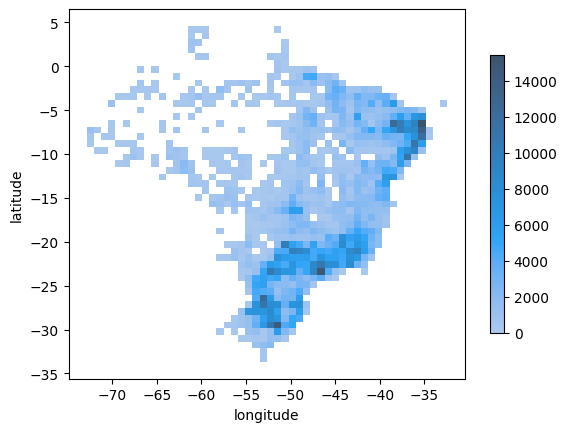

In [25]:
sns.histplot(x='longitude', y='latitude', data=tabela_merge_lat_long, bins=50, kde=True, cbar=True, cbar_kws=dict(shrink=.75))

Mostrando as regiões disponível para analisar

In [26]:
regiao = tabela_merge_lat_long['NM_REGIAO'].unique()

print('Escolha uma região para analisar')
for r in regiao:
    print(r, end=' ')

Escolha uma região para analisar
Norte Nordeste Sul Sudeste Centro-Oeste 

<Axes: xlabel='longitude', ylabel='latitude'>

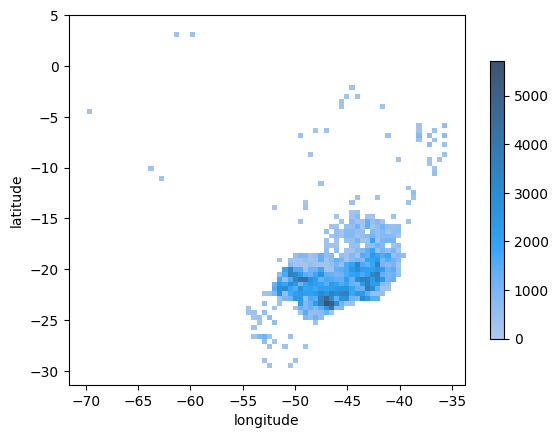

In [27]:
regiao_escolhida = 'Sudeste'
tabela_fitrado_regiao = tabela_merge_lat_long[tabela_merge_lat_long['NM_REGIAO'] == regiao_escolhida]
sns.histplot(x='longitude', y='latitude', data=tabela_fitrado_regiao, bins=70, kde=True, cbar=True, cbar_kws=dict(shrink=.75))

In [28]:
planos = tabela_fitrado_regiao['ID_PLANO'].unique()

valor_mensalidade_total = tabela_fitrado_regiao['VCM'].sum()

numero_total_adesao = tabela_fitrado_regiao['VCM'].count()

media_valor_mensalidade = valor_mensalidade_total / numero_total_adesao

faixa_etaria_total = tabela_fitrado_regiao['CD_FAIXA_ETARIA'].sum()

media_faixa_etaria = faixa_etaria_total / numero_total_adesao

print(f'Até o ano de {DATA_BASE - 1} há {len(planos)} planos ativos na região: {regiao_escolhida} do Brasil')
print(f'O valor medio mensal paga é de {media_valor_mensalidade:.2f}')
print(f'O valor medio das idades é de {media_faixa_etaria:.2f}')
for k, v in faixa.items():
    print(f'{k}: {v}')

Até o ano de 2022 há 1553 planos ativos na região: Sudeste do Brasil
O valor medio mensal paga é de 1161.77
O valor medio das idades é de 5.49
1: 00 (zero) a 18 (dezoito) anos
2: 19 (dezenove) a 23 (vinte e três) anos
3: 24 (vinte e quatro) a 28 (vinte e oito) anos
4: 29 (vinte e nove) a 33 (trinta e três) anos
5: 34 (trinta e quatro) a 38 (trinta e oito) anos
6: 39 (trinta e nove) a 43 (quarenta e três) anos
7: 44 (quarenta e quatro) a 48 (quarenta e oito) anos
8: 49 (quarenta e nove) a 53 (cinquenta e três) anos
9: 54 (cinquenta e quatro) a 58 (cinquenta e oito) anos
10: 59 (cinquenta e nove) anos ou mais


Região analisada: Sudeste
         
         Faixa etária
            (01)  00 (zero) a 18 (dezoito) anos;
            (02)  19 (dezenove) a 23 (vinte e três) anos;
            (03)  24 (vinte e quatro) a 28 (vinte e oito) anos;
            (04)  29 (vinte e nove) a 33 (trinta e três) anos;
            (05)  34 (trinta e quatro) a 38 (trinta e oito) anos;
            (06)  39 (trinta e nove) a 43 (quarenta e três) anos;
            (07)  44 (quarenta e quatro) a 48 (quarenta e oito) anos;
            (08)  49 (quarenta e nove) a 53 (cinquenta e três) anos;
            (09)  54 (cinquenta e quatro) a 58 (cinquenta e oito) anos;
            (10)  59 (cinquenta e nove) anos ou mais.


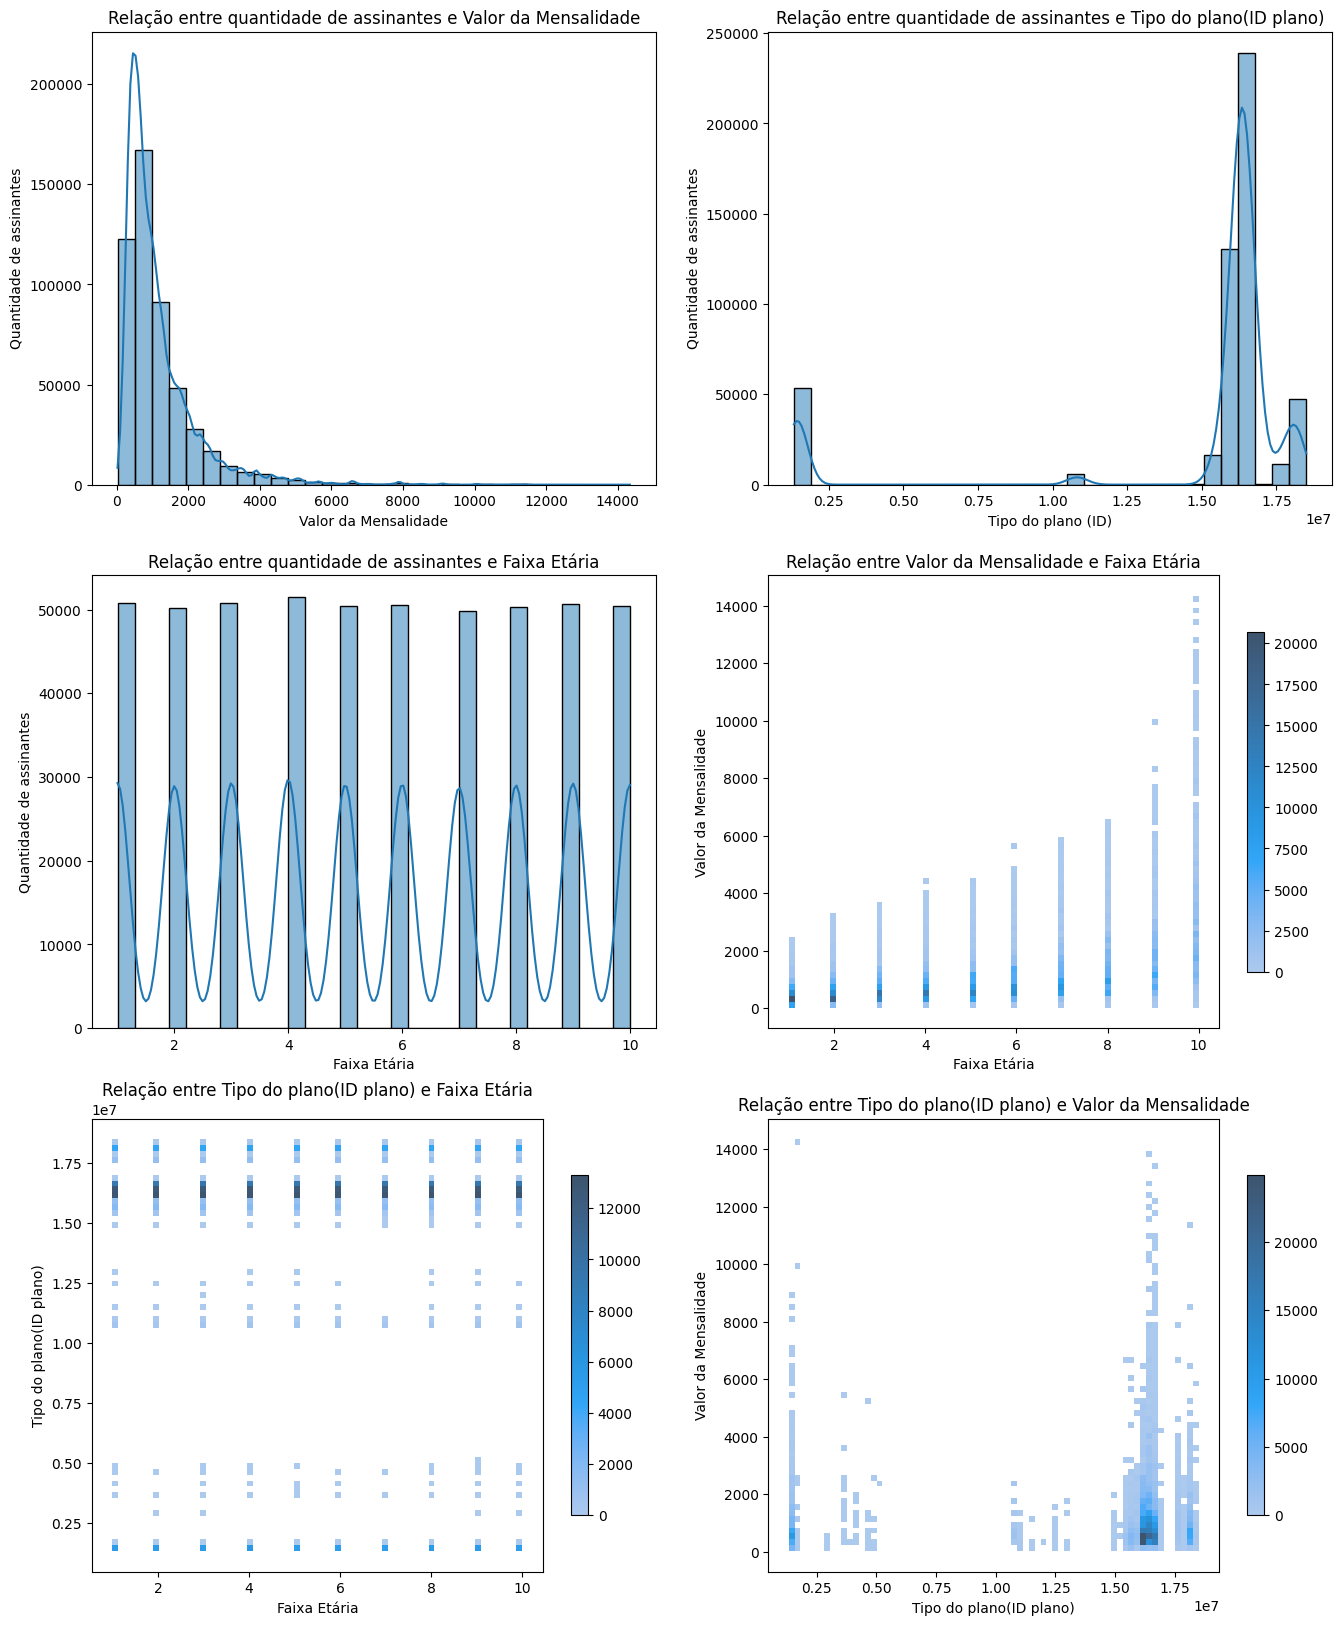

In [29]:
plt.figure(figsize=(16, 20))
plt.subplot(3, 2, 1)
sns.histplot(tabela_fitrado_regiao['VCM'], bins=30, kde=True)
plt.title('Relação entre quantidade de assinantes e Valor da Mensalidade')
plt.xlabel('Valor da Mensalidade')
plt.ylabel('Quantidade de assinantes')
plt.subplot(3, 2, 2)
sns.histplot(tabela_fitrado_regiao['ID_PLANO'], bins=30, kde=True)
plt.title('Relação entre quantidade de assinantes e Tipo do plano(ID plano)')
plt.xlabel('Tipo do plano (ID)')
plt.ylabel('Quantidade de assinantes')
plt.subplot(3, 2, 3)
sns.histplot(tabela_fitrado_regiao['CD_FAIXA_ETARIA'], bins=30, kde=True)
plt.title('Relação entre quantidade de assinantes e Faixa Etária')
plt.xlabel('Faixa Etária')
plt.ylabel('Quantidade de assinantes')
plt.subplot(3, 2, 4)
sns.histplot(x='CD_FAIXA_ETARIA', y='VCM', data=tabela_fitrado_regiao, bins=70, kde=True, cbar=True, cbar_kws=dict(shrink=.75))
plt.title('Relação entre Valor da Mensalidade e Faixa Etária')
plt.xlabel('Faixa Etária')
plt.ylabel('Valor da Mensalidade')
plt.subplot(3, 2, 5)
sns.histplot(x='CD_FAIXA_ETARIA', y='ID_PLANO', data=tabela_fitrado_regiao, bins=70, kde=True, cbar=True, cbar_kws=dict(shrink=.75))
plt.title('Relação entre Tipo do plano(ID plano) e Faixa Etária')
plt.xlabel('Faixa Etária')
plt.ylabel('Tipo do plano(ID plano)')
plt.subplot(3, 2, 6)
sns.histplot(x='ID_PLANO', y='VCM', data=tabela_fitrado_regiao, bins=70, kde=True, cbar=True, cbar_kws=dict(shrink=.75))
plt.title('Relação entre Tipo do plano(ID plano) e Valor da Mensalidade')
plt.xlabel('Tipo do plano(ID plano)')
plt.ylabel('Valor da Mensalidade')
print(f"""Região analisada: {regiao_escolhida}
         
         Faixa etária
            (01)  00 (zero) a 18 (dezoito) anos;
            (02)  19 (dezenove) a 23 (vinte e três) anos;
            (03)  24 (vinte e quatro) a 28 (vinte e oito) anos;
            (04)  29 (vinte e nove) a 33 (trinta e três) anos;
            (05)  34 (trinta e quatro) a 38 (trinta e oito) anos;
            (06)  39 (trinta e nove) a 43 (quarenta e três) anos;
            (07)  44 (quarenta e quatro) a 48 (quarenta e oito) anos;
            (08)  49 (quarenta e nove) a 53 (cinquenta e três) anos;
            (09)  54 (cinquenta e quatro) a 58 (cinquenta e oito) anos;
            (10)  59 (cinquenta e nove) anos ou mais.""")
plt.show()

In [30]:
estados = tabela_fitrado_regiao['SG_UF'].unique()

print('Escolha um estado para analisar')
for e in estados:
    print(e, end=' ')

Escolha um estado para analisar
MG SP RJ ES 

<Axes: xlabel='longitude', ylabel='latitude'>

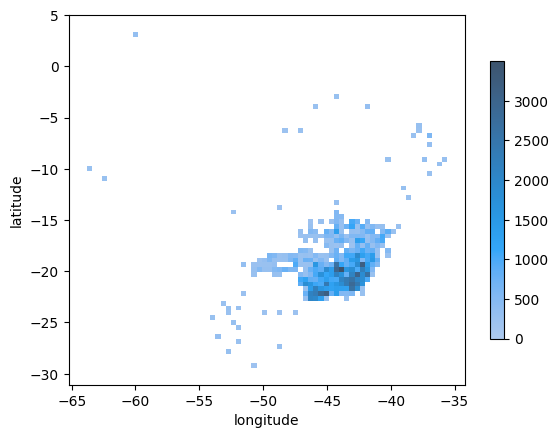

In [31]:
estado_escolhido = 'MG'
tabela_fitrado_estado = tabela_fitrado_regiao[tabela_fitrado_regiao['SG_UF'] == estado_escolhido]
sns.histplot(x='longitude', y='latitude', data=tabela_fitrado_estado, bins=70, kde=True, cbar=True, cbar_kws=dict(shrink=.75))

In [32]:
planos = tabela_fitrado_estado['ID_PLANO'].unique()

valor_mensalidade_total = tabela_fitrado_estado['VCM'].sum()

numero_total_adesao = tabela_fitrado_estado['VCM'].count()

media_valor_mensalidade = valor_mensalidade_total / numero_total_adesao

faixa_etaria_total = tabela_fitrado_estado['CD_FAIXA_ETARIA'].sum()

media_faixa_etaria = faixa_etaria_total / numero_total_adesao

print(f'Até o ano de {DATA_BASE - 1} há {len(planos)} planos ativos no estado: {estado_escolhido}, da região: {regiao_escolhida} do Brasil')
print(f'O valor medio mensal paga é de {media_valor_mensalidade:.2f}')
print(f'O valor medio das idades é de {media_faixa_etaria:.2f}')
for k, v in faixa.items():
    print(f'{k}: {v}')

Até o ano de 2022 há 664 planos ativos no estado: MG, da região: Sudeste do Brasil
O valor medio mensal paga é de 1151.16
O valor medio das idades é de 5.49
1: 00 (zero) a 18 (dezoito) anos
2: 19 (dezenove) a 23 (vinte e três) anos
3: 24 (vinte e quatro) a 28 (vinte e oito) anos
4: 29 (vinte e nove) a 33 (trinta e três) anos
5: 34 (trinta e quatro) a 38 (trinta e oito) anos
6: 39 (trinta e nove) a 43 (quarenta e três) anos
7: 44 (quarenta e quatro) a 48 (quarenta e oito) anos
8: 49 (quarenta e nove) a 53 (cinquenta e três) anos
9: 54 (cinquenta e quatro) a 58 (cinquenta e oito) anos
10: 59 (cinquenta e nove) anos ou mais


Estado analisado: MG - Sudeste
         
         Faixa etária
            (01)  00 (zero) a 18 (dezoito) anos;
            (02)  19 (dezenove) a 23 (vinte e três) anos;
            (03)  24 (vinte e quatro) a 28 (vinte e oito) anos;
            (04)  29 (vinte e nove) a 33 (trinta e três) anos;
            (05)  34 (trinta e quatro) a 38 (trinta e oito) anos;
            (06)  39 (trinta e nove) a 43 (quarenta e três) anos;
            (07)  44 (quarenta e quatro) a 48 (quarenta e oito) anos;
            (08)  49 (quarenta e nove) a 53 (cinquenta e três) anos;
            (09)  54 (cinquenta e quatro) a 58 (cinquenta e oito) anos;
            (10)  59 (cinquenta e nove) anos ou mais.


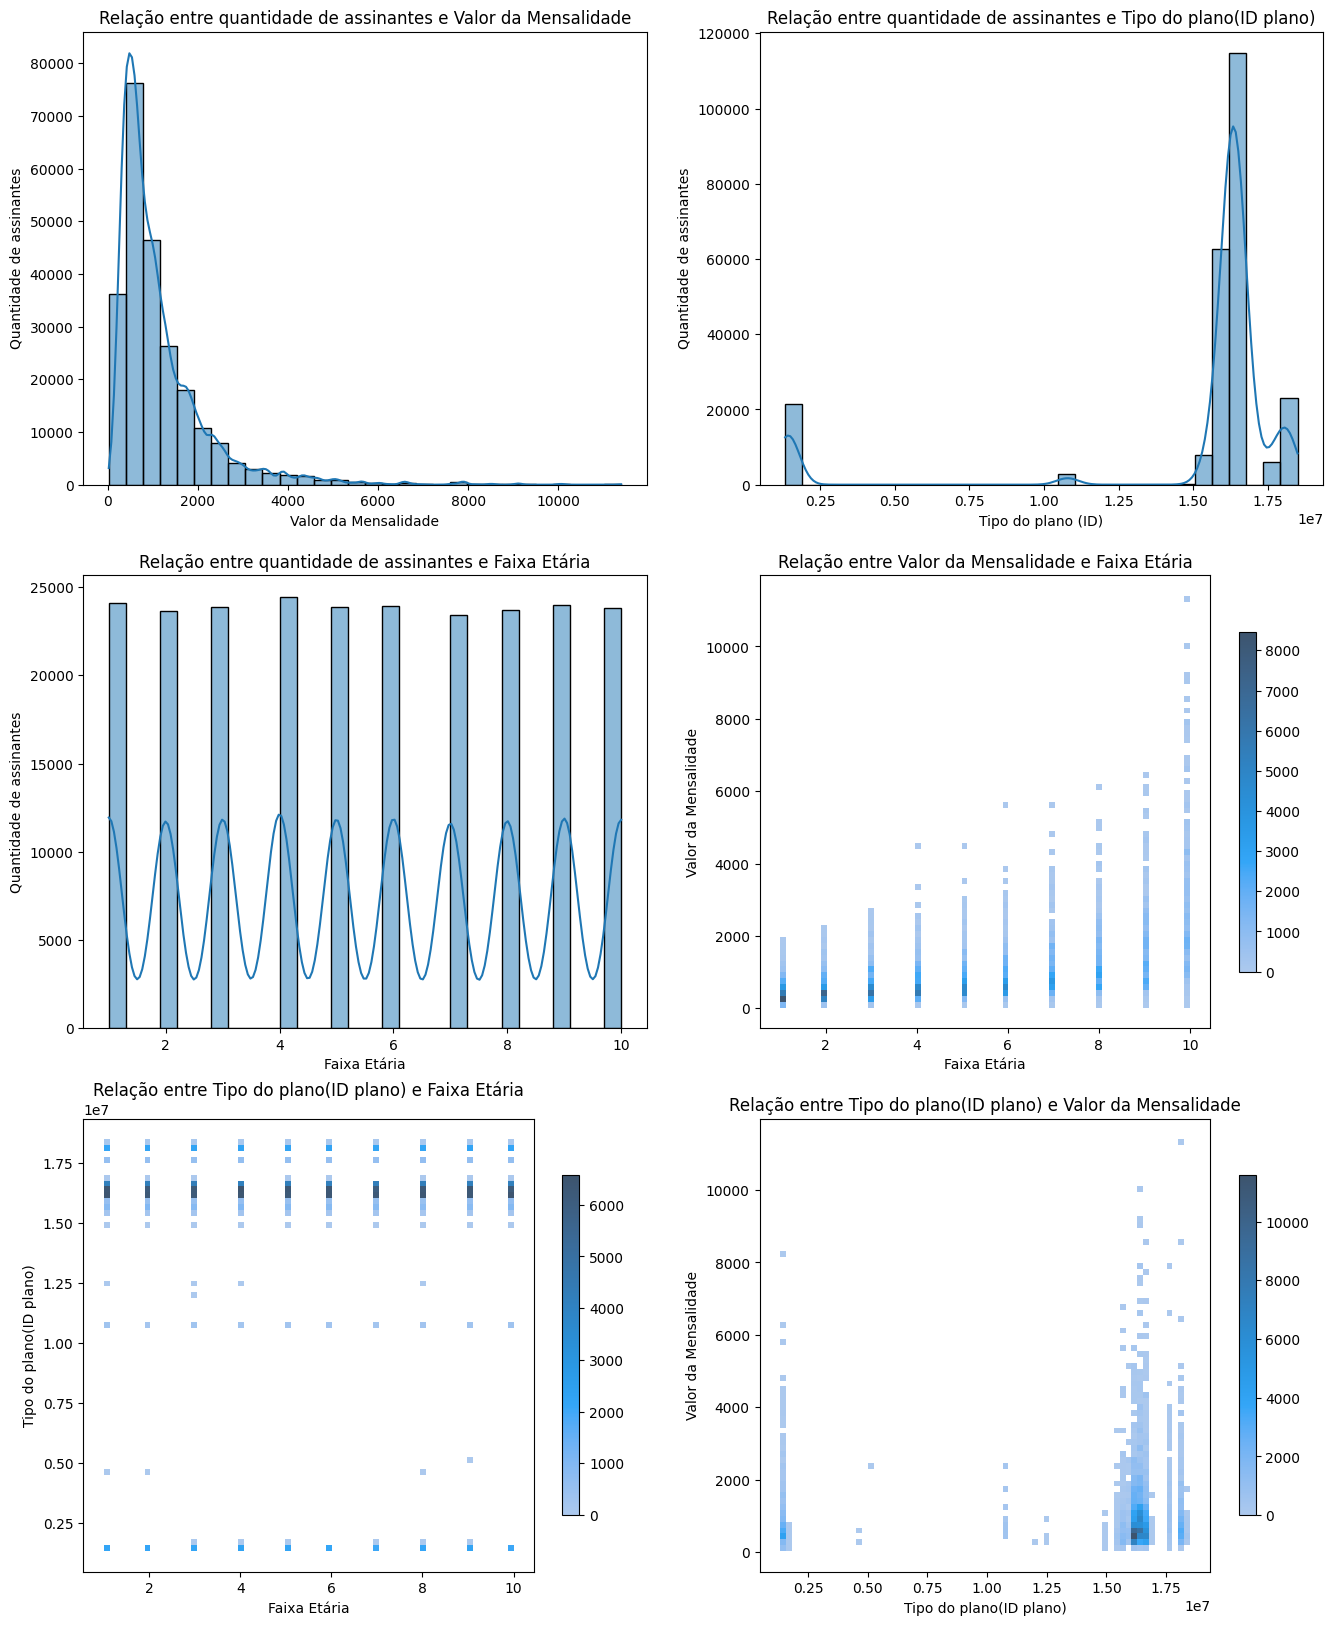

In [33]:
plt.figure(figsize=(16, 20))
plt.subplot(3, 2, 1)
sns.histplot(tabela_fitrado_estado['VCM'], bins=30, kde=True)
plt.title('Relação entre quantidade de assinantes e Valor da Mensalidade')
plt.xlabel('Valor da Mensalidade')
plt.ylabel('Quantidade de assinantes')
plt.subplot(3, 2, 2)
sns.histplot(tabela_fitrado_estado['ID_PLANO'], bins=30, kde=True)
plt.title('Relação entre quantidade de assinantes e Tipo do plano(ID plano)')
plt.xlabel('Tipo do plano (ID)')
plt.ylabel('Quantidade de assinantes')
plt.subplot(3, 2, 3)
sns.histplot(tabela_fitrado_estado['CD_FAIXA_ETARIA'], bins=30, kde=True)
plt.title('Relação entre quantidade de assinantes e Faixa Etária')
plt.xlabel('Faixa Etária')
plt.ylabel('Quantidade de assinantes')
plt.subplot(3, 2, 4)
sns.histplot(x='CD_FAIXA_ETARIA', y='VCM', data=tabela_fitrado_estado, bins=70, kde=True, cbar=True, cbar_kws=dict(shrink=.75))
plt.title('Relação entre Valor da Mensalidade e Faixa Etária')
plt.xlabel('Faixa Etária')
plt.ylabel('Valor da Mensalidade')
plt.subplot(3, 2, 5)
sns.histplot(x='CD_FAIXA_ETARIA', y='ID_PLANO', data=tabela_fitrado_estado, bins=70, kde=True, cbar=True, cbar_kws=dict(shrink=.75))
plt.title('Relação entre Tipo do plano(ID plano) e Faixa Etária')
plt.xlabel('Faixa Etária')
plt.ylabel('Tipo do plano(ID plano)')
plt.subplot(3, 2, 6)
sns.histplot(x='ID_PLANO', y='VCM', data=tabela_fitrado_estado, bins=70, kde=True, cbar=True, cbar_kws=dict(shrink=.75))
plt.title('Relação entre Tipo do plano(ID plano) e Valor da Mensalidade')
plt.xlabel('Tipo do plano(ID plano)')
plt.ylabel('Valor da Mensalidade')
print(f"""Estado analisado: {estado_escolhido} - {regiao_escolhida}
         
         Faixa etária
            (01)  00 (zero) a 18 (dezoito) anos;
            (02)  19 (dezenove) a 23 (vinte e três) anos;
            (03)  24 (vinte e quatro) a 28 (vinte e oito) anos;
            (04)  29 (vinte e nove) a 33 (trinta e três) anos;
            (05)  34 (trinta e quatro) a 38 (trinta e oito) anos;
            (06)  39 (trinta e nove) a 43 (quarenta e três) anos;
            (07)  44 (quarenta e quatro) a 48 (quarenta e oito) anos;
            (08)  49 (quarenta e nove) a 53 (cinquenta e três) anos;
            (09)  54 (cinquenta e quatro) a 58 (cinquenta e oito) anos;
            (10)  59 (cinquenta e nove) anos ou mais.""")
plt.show()

In [34]:
municipio = tabela_fitrado_estado['NM_MUNICIPIO'].unique()

print('Escolha um município para analisar')
for m in municipio:
    print(m)

Escolha um município para analisar
Buritis
Nova União
Bonfim
Riachinho
Presidente Juscelino
Santa Luzia
São João do Paraíso
São José do Divino
Ouro Branco
Viçosa
Bom Sucesso
Prata
São Francisco
Lagoa Grande
Campestre
Canápolis
Candeias
Santa Bárbara
Abadia dos Dourados
Abaeté
Abre Campo
Acaiaca
Açucena
Água Boa
Água Comprida
Aguanil
Águas Formosas
Águas Vermelhas
Aimorés
Aiuruoca
Alagoa
Albertina
Além Paraíba
Alfenas
Alfredo Vasconcelos
Almenara
Alpercata
Alpinópolis
Alterosa
Alto Caparaó
Alto Rio Doce
Alvarenga
Alvinópolis
Alvorada de Minas
Amparo do Serra
Andradas
Cachoeira de Pajeú
Andrelândia
Angelândia
Antônio Carlos
Antônio Dias
Antônio Prado de Minas
Araçaí
Aracitaba
Araçuaí
Araguari
Arantina
Araponga
Araporã
Arapuá
Araújos
Araxá
Arceburgo
Arcos
Areado
Argirita
Aricanduva
Arinos
Astolfo Dutra
Ataléia
Augusto de Lima
Baependi
Baldim
Bambuí
Bandeira
Bandeira do Sul
Barão de Cocais
Barão de Monte Alto
Barbacena
Barra Longa
Barroso
Bela Vista de Minas
Belmiro Braga
Belo Horizonte
Be

<Axes: xlabel='longitude', ylabel='latitude'>

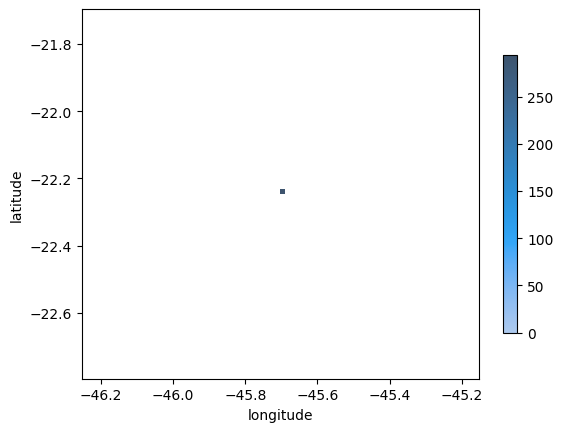

In [35]:
municipio_escolhido = 'Santa Rita do Sapucaí'
tabela_fitrado_municipio = tabela_fitrado_estado[tabela_fitrado_estado['NM_MUNICIPIO'] == municipio_escolhido]
sns.histplot(x='longitude', y='latitude', data=tabela_fitrado_municipio, bins=70, kde=True, cbar=True, cbar_kws=dict(shrink=.75))

In [36]:
planos = tabela_fitrado_municipio['ID_PLANO'].unique()

valor_mensalidade_total = tabela_fitrado_municipio['VCM'].sum()

numero_total_adesao = tabela_fitrado_municipio['VCM'].count()

media_valor_mensalidade = valor_mensalidade_total / numero_total_adesao

faixa_etaria_total = tabela_fitrado_municipio['CD_FAIXA_ETARIA'].sum()

media_faixa_etaria = faixa_etaria_total / numero_total_adesao

print(f'Até o ano de {DATA_BASE - 1} há {len(planos)} planos ativos na cidade: {municipio_escolhido} estado: {estado_escolhido}, da região: {regiao_escolhida} do Brasil')
print(f'O valor medio mensal paga é de {media_valor_mensalidade:.2f}')
print(f'O valor medio das idades é de {media_faixa_etaria:.2f}')
for k, v in faixa.items():
    print(f'{k}: {v}')

Até o ano de 2022 há 171 planos ativos na cidade: Santa Rita do Sapucaí estado: MG, da região: Sudeste do Brasil
O valor medio mensal paga é de 1096.91
O valor medio das idades é de 5.28
1: 00 (zero) a 18 (dezoito) anos
2: 19 (dezenove) a 23 (vinte e três) anos
3: 24 (vinte e quatro) a 28 (vinte e oito) anos
4: 29 (vinte e nove) a 33 (trinta e três) anos
5: 34 (trinta e quatro) a 38 (trinta e oito) anos
6: 39 (trinta e nove) a 43 (quarenta e três) anos
7: 44 (quarenta e quatro) a 48 (quarenta e oito) anos
8: 49 (quarenta e nove) a 53 (cinquenta e três) anos
9: 54 (cinquenta e quatro) a 58 (cinquenta e oito) anos
10: 59 (cinquenta e nove) anos ou mais


Município analisado: Santa Rita do Sapucaí - MG - Sudeste
         
         Faixa etária
            (01)  00 (zero) a 18 (dezoito) anos;
            (02)  19 (dezenove) a 23 (vinte e três) anos;
            (03)  24 (vinte e quatro) a 28 (vinte e oito) anos;
            (04)  29 (vinte e nove) a 33 (trinta e três) anos;
            (05)  34 (trinta e quatro) a 38 (trinta e oito) anos;
            (06)  39 (trinta e nove) a 43 (quarenta e três) anos;
            (07)  44 (quarenta e quatro) a 48 (quarenta e oito) anos;
            (08)  49 (quarenta e nove) a 53 (cinquenta e três) anos;
            (09)  54 (cinquenta e quatro) a 58 (cinquenta e oito) anos;
            (10)  59 (cinquenta e nove) anos ou mais.


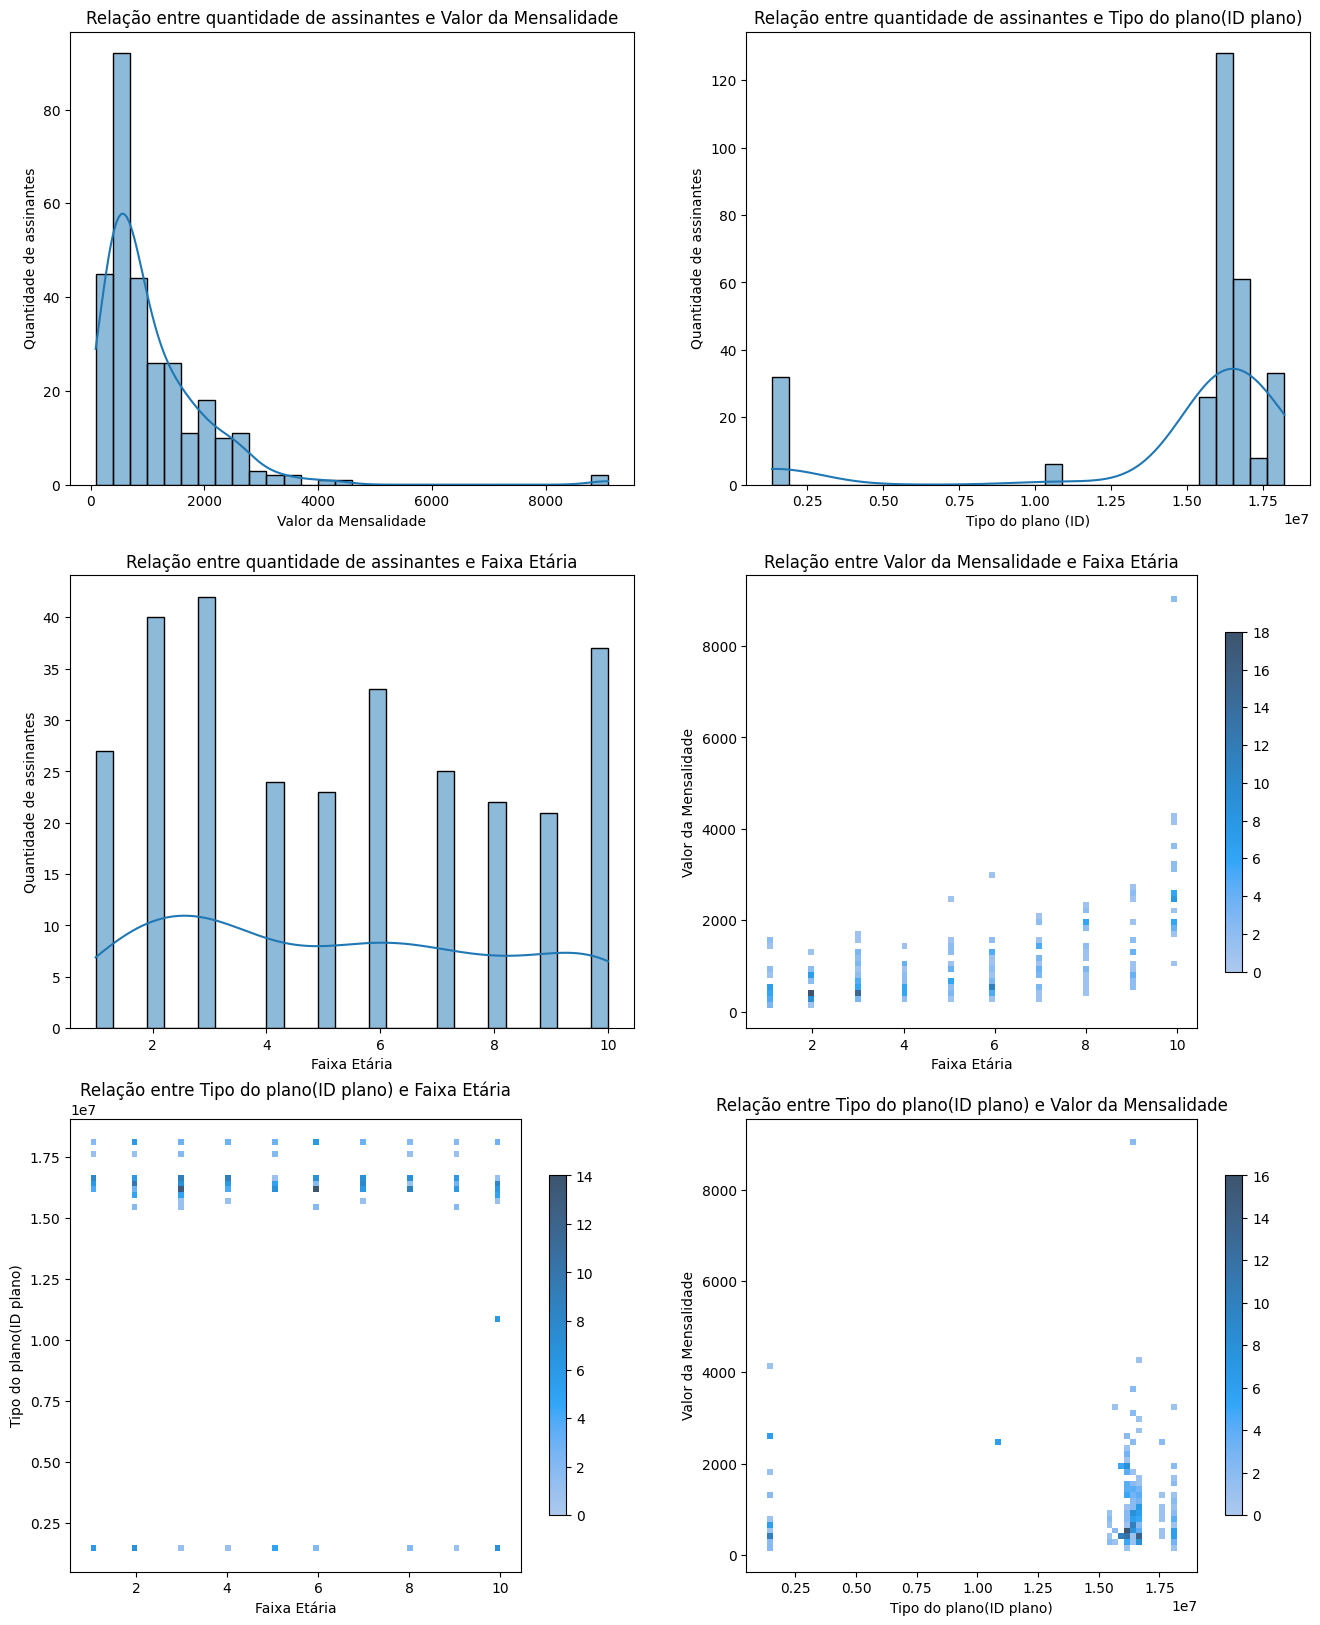

In [37]:
plt.figure(figsize=(16, 20))
plt.subplot(3, 2, 1)
sns.histplot(tabela_fitrado_municipio['VCM'], bins=30, kde=True)
plt.title('Relação entre quantidade de assinantes e Valor da Mensalidade')
plt.xlabel('Valor da Mensalidade')
plt.ylabel('Quantidade de assinantes')
plt.subplot(3, 2, 2)
sns.histplot(tabela_fitrado_municipio['ID_PLANO'], bins=30, kde=True)
plt.title('Relação entre quantidade de assinantes e Tipo do plano(ID plano)')
plt.xlabel('Tipo do plano (ID)')
plt.ylabel('Quantidade de assinantes')
plt.subplot(3, 2, 3)
sns.histplot(tabela_fitrado_municipio['CD_FAIXA_ETARIA'], bins=30, kde=True)
plt.title('Relação entre quantidade de assinantes e Faixa Etária')
plt.xlabel('Faixa Etária')
plt.ylabel('Quantidade de assinantes')
plt.subplot(3, 2, 4)
sns.histplot(x='CD_FAIXA_ETARIA', y='VCM', data=tabela_fitrado_municipio, bins=70, kde=True, cbar=True, cbar_kws=dict(shrink=.75))
plt.title('Relação entre Valor da Mensalidade e Faixa Etária')
plt.xlabel('Faixa Etária')
plt.ylabel('Valor da Mensalidade')
plt.subplot(3, 2, 5)
sns.histplot(x='CD_FAIXA_ETARIA', y='ID_PLANO', data=tabela_fitrado_municipio, bins=70, kde=True, cbar=True, cbar_kws=dict(shrink=.75))
plt.title('Relação entre Tipo do plano(ID plano) e Faixa Etária')
plt.xlabel('Faixa Etária')
plt.ylabel('Tipo do plano(ID plano)')
plt.subplot(3, 2, 6)
sns.histplot(x='ID_PLANO', y='VCM', data=tabela_fitrado_municipio, bins=70, kde=True, cbar=True, cbar_kws=dict(shrink=.75))
plt.title('Relação entre Tipo do plano(ID plano) e Valor da Mensalidade')
plt.xlabel('Tipo do plano(ID plano)')
plt.ylabel('Valor da Mensalidade')
print(f"""Município analisado: {municipio_escolhido} - {estado_escolhido} - {regiao_escolhida}
         
         Faixa etária
            (01)  00 (zero) a 18 (dezoito) anos;
            (02)  19 (dezenove) a 23 (vinte e três) anos;
            (03)  24 (vinte e quatro) a 28 (vinte e oito) anos;
            (04)  29 (vinte e nove) a 33 (trinta e três) anos;
            (05)  34 (trinta e quatro) a 38 (trinta e oito) anos;
            (06)  39 (trinta e nove) a 43 (quarenta e três) anos;
            (07)  44 (quarenta e quatro) a 48 (quarenta e oito) anos;
            (08)  49 (quarenta e nove) a 53 (cinquenta e três) anos;
            (09)  54 (cinquenta e quatro) a 58 (cinquenta e oito) anos;
            (10)  59 (cinquenta e nove) anos ou mais.""")
plt.show()

Filtrando os planos mais concentrados

In [38]:
minimo = 1.5 * 10 ** 7
maximo = 1.75 * 10 ** 7

tabela_planos = tabela_fitrado_municipio[tabela_fitrado_municipio['ID_PLANO'] >= minimo]

tabela_planos = tabela_planos[tabela_planos['ID_PLANO'] <= maximo]

tabela_planos

,CD_MUNICIPIO,ID_PLANO,CD_FAIXA_ETARIA,VCM,DT_FIM_STATUS,DE_SITUACAO_PRINCIPAL,NM_MUNICIPIO,SG_UF,NM_REGIAO,latitude,longitude
958679,315960,15445357,6,357.82,16/12/2013,ATIVO,Santa Rita do Sapucaí,MG,Sudeste,-22.2461,-45.7034
958680,315960,15544588,2,258.37,11/10/2013,ATIVO,Santa Rita do Sapucaí,MG,Sudeste,-22.2461,-45.7034
958681,315960,15544588,2,258.37,19/11/2015,ATIVO,Santa Rita do Sapucaí,MG,Sudeste,-22.2461,-45.7034
958682,315960,15544588,9,765.70,11/10/2013,ATIVO,Santa Rita do Sapucaí,MG,Sudeste,-22.2461,-45.7034
958683,315960,15544588,9,765.70,19/11/2015,ATIVO,Santa Rita do Sapucaí,MG,Sudeste,-22.2461,-45.7034
...,...,...,...,...,...,...,...,...,...,...,...
958889,315960,16702158,8,554.19,19/07/2021,ATIVO,Santa Rita do Sapucaí,MG,Sudeste,-22.2461,-45.7034
958890,315960,16729568,6,303.53,09/10/2019,ATIVO,Santa Rita do Sapucaí,MG,Sudeste,-22.2461,-45.7034
958891,315960,16760875,2,311.41,19/07/2021,ATIVO,Santa Rita do Sapucaí,MG,Sudeste,-22.2461,-45.7034
958892,315960,16760886,1,302.21,19/07/2021,ATIVO,Santa Rita do Sapucaí,MG,Sudeste,-22.2461,-45.7034


In [39]:
planos = tabela_planos['ID_PLANO'].unique()

valor_mensalidade_total = tabela_planos['VCM'].sum()

numero_total_adesao = tabela_planos['VCM'].count()

media_valor_mensalidade = valor_mensalidade_total / numero_total_adesao

faixa_etaria_total = tabela_planos['CD_FAIXA_ETARIA'].sum()

media_faixa_etaria = faixa_etaria_total / numero_total_adesao

print(f'Até o ano de {DATA_BASE - 1} há {len(planos)} planos ativos na cidade: {municipio_escolhido} estado: {estado_escolhido}, da região: {regiao_escolhida} do Brasil')
print(f'O valor medio mensal paga é de {media_valor_mensalidade:.2f}')
print(f'O valor medio das idades é de {media_faixa_etaria:.2f}')
for k, v in faixa.items():
    print(f'{k}: {v}')

Até o ano de 2022 há 123 planos ativos na cidade: Santa Rita do Sapucaí estado: MG, da região: Sudeste do Brasil
O valor medio mensal paga é de 1091.14
O valor medio das idades é de 5.24
1: 00 (zero) a 18 (dezoito) anos
2: 19 (dezenove) a 23 (vinte e três) anos
3: 24 (vinte e quatro) a 28 (vinte e oito) anos
4: 29 (vinte e nove) a 33 (trinta e três) anos
5: 34 (trinta e quatro) a 38 (trinta e oito) anos
6: 39 (trinta e nove) a 43 (quarenta e três) anos
7: 44 (quarenta e quatro) a 48 (quarenta e oito) anos
8: 49 (quarenta e nove) a 53 (cinquenta e três) anos
9: 54 (cinquenta e quatro) a 58 (cinquenta e oito) anos
10: 59 (cinquenta e nove) anos ou mais


Município analisado: Santa Rita do Sapucaí - MG - Sudeste
Planos ID entre 15000000.0 e 17500000.0
         
         Faixa etária
            (01)  00 (zero) a 18 (dezoito) anos;
            (02)  19 (dezenove) a 23 (vinte e três) anos;
            (03)  24 (vinte e quatro) a 28 (vinte e oito) anos;
            (04)  29 (vinte e nove) a 33 (trinta e três) anos;
            (05)  34 (trinta e quatro) a 38 (trinta e oito) anos;
            (06)  39 (trinta e nove) a 43 (quarenta e três) anos;
            (07)  44 (quarenta e quatro) a 48 (quarenta e oito) anos;
            (08)  49 (quarenta e nove) a 53 (cinquenta e três) anos;
            (09)  54 (cinquenta e quatro) a 58 (cinquenta e oito) anos;
            (10)  59 (cinquenta e nove) anos ou mais.


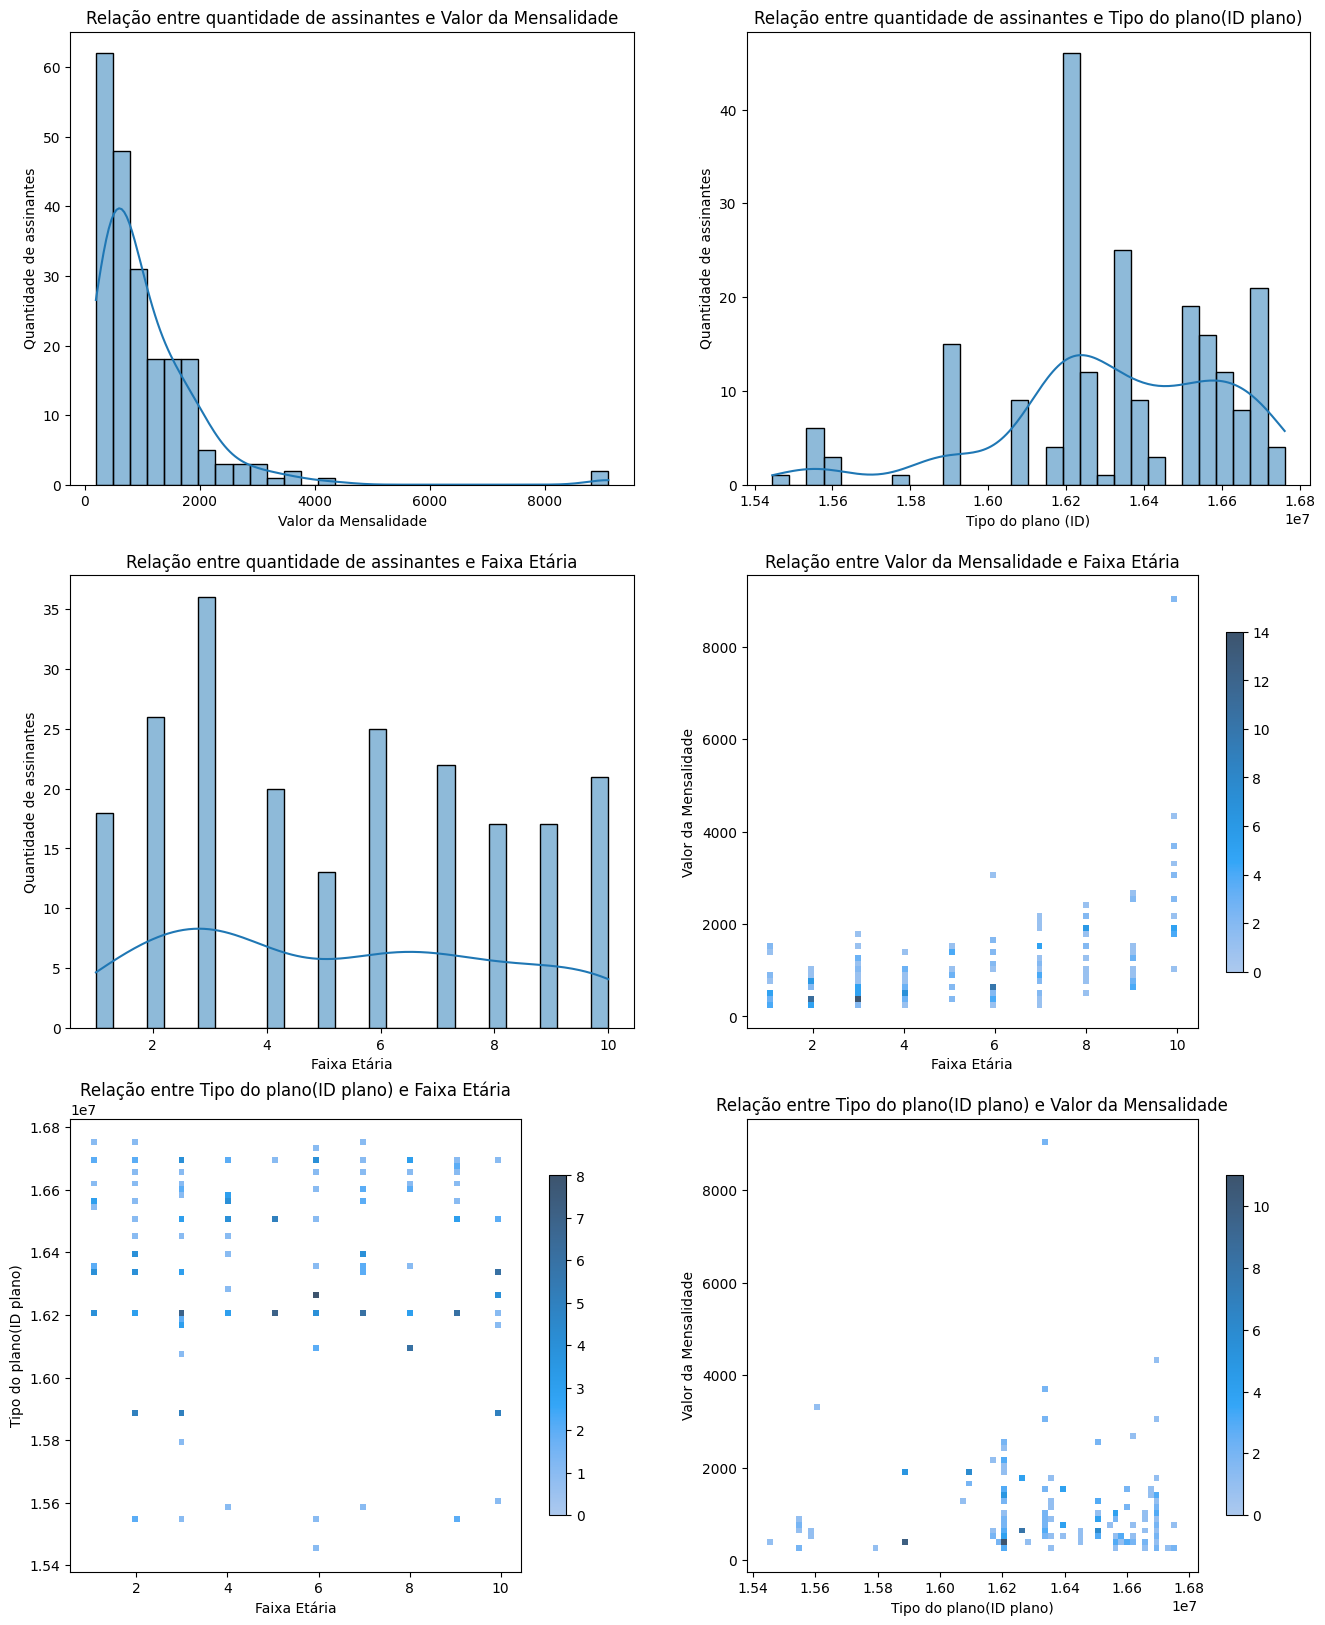

In [40]:
plt.figure(figsize=(16, 20))
plt.subplot(3, 2, 1)
sns.histplot(tabela_planos['VCM'], bins=30, kde=True)
plt.title('Relação entre quantidade de assinantes e Valor da Mensalidade')
plt.xlabel('Valor da Mensalidade')
plt.ylabel('Quantidade de assinantes')
plt.subplot(3, 2, 2)
sns.histplot(tabela_planos['ID_PLANO'], bins=30, kde=True)
plt.title('Relação entre quantidade de assinantes e Tipo do plano(ID plano)')
plt.xlabel('Tipo do plano (ID)')
plt.ylabel('Quantidade de assinantes')
plt.subplot(3, 2, 3)
sns.histplot(tabela_planos['CD_FAIXA_ETARIA'], bins=30, kde=True)
plt.title('Relação entre quantidade de assinantes e Faixa Etária')
plt.xlabel('Faixa Etária')
plt.ylabel('Quantidade de assinantes')
plt.subplot(3, 2, 4)
sns.histplot(x='CD_FAIXA_ETARIA', y='VCM', data=tabela_planos, bins=70, kde=True, cbar=True, cbar_kws=dict(shrink=.75))
plt.title('Relação entre Valor da Mensalidade e Faixa Etária')
plt.xlabel('Faixa Etária')
plt.ylabel('Valor da Mensalidade')
plt.subplot(3, 2, 5)
sns.histplot(x='CD_FAIXA_ETARIA', y='ID_PLANO', data=tabela_planos, bins=70, kde=True, cbar=True, cbar_kws=dict(shrink=.75))
plt.title('Relação entre Tipo do plano(ID plano) e Faixa Etária')
plt.xlabel('Faixa Etária')
plt.ylabel('Tipo do plano(ID plano)')
plt.subplot(3, 2, 6)
sns.histplot(x='ID_PLANO', y='VCM', data=tabela_planos, bins=70, kde=True, cbar=True, cbar_kws=dict(shrink=.75))
plt.title('Relação entre Tipo do plano(ID plano) e Valor da Mensalidade')
plt.xlabel('Tipo do plano(ID plano)')
plt.ylabel('Valor da Mensalidade')
print(f"""Município analisado: {municipio_escolhido} - {estado_escolhido} - {regiao_escolhida}
Planos ID entre {minimo} e {maximo}
         
         Faixa etária
            (01)  00 (zero) a 18 (dezoito) anos;
            (02)  19 (dezenove) a 23 (vinte e três) anos;
            (03)  24 (vinte e quatro) a 28 (vinte e oito) anos;
            (04)  29 (vinte e nove) a 33 (trinta e três) anos;
            (05)  34 (trinta e quatro) a 38 (trinta e oito) anos;
            (06)  39 (trinta e nove) a 43 (quarenta e três) anos;
            (07)  44 (quarenta e quatro) a 48 (quarenta e oito) anos;
            (08)  49 (quarenta e nove) a 53 (cinquenta e três) anos;
            (09)  54 (cinquenta e quatro) a 58 (cinquenta e oito) anos;
            (10)  59 (cinquenta e nove) anos ou mais.""")
plt.show()

Abrindo o banco de dados caracteristica do produto, utilizado as informações de cada plano

In [41]:
tabela_caracteristicas = pd.read_csv(URL_ARQUIVO_CARACTERISTICAS_PRODUTOS, sep=";")

tabela_caracteristicas_simplificada = tabela_caracteristicas[['ID_PLANO', 'NM_PLANO', 'RAZAO_SOCIAL', 'GR_MODALIDADE', 'PORTE_OPERADORA', 'CONTRATACAO', 'SGMT_ASSISTENCIAL', 'ABRANGENCIA_COBERTURA', 'FATOR_MODERADOR', 'ACOMODACAO_HOSPITALAR', 'LIVRE_ESCOLHA']]

tabela_caracteristicas_simplificada

,ID_PLANO,NM_PLANO,RAZAO_SOCIAL,GR_MODALIDADE,PORTE_OPERADORA,CONTRATACAO,SGMT_ASSISTENCIAL,ABRANGENCIA_COBERTURA,FATOR_MODERADOR,ACOMODACAO_HOSPITALAR,LIVRE_ESCOLHA
0,15445375,Unimed Adesão II - Básico Participativo,Insolvência Civil De Unimed Salvador Cooperati...,Cooperativa Médica,Sem beneficiários,Coletivo por adesão,Ambulatorial + Hospitalar com obstetrícia,Grupo de municípios,Coparticipacão,Coletiva,Ausente
1,15878143,"NOVO UNIPLAN PF - MÓDULO 1, 2 e 3",Insolvência Civil De Unimed Salvador Cooperati...,Cooperativa Médica,Sem beneficiários,Individual ou familiar,Ambulatorial + Hospitalar com obstetrícia,Nacional,Ausente,Não Informado,Total
2,1489836,Uniplan Hospitalar - Pessoa Física - Plus,Unimed Centro Sul Fluminense Cooperativa De Tr...,Cooperativa Médica,Pequeno,Individual ou familiar,Hospitalar sem obstetrícia,Nacional,Ausente,Não Informado,Ausente
3,1489859,Unimed Regional Sul - Básico Pessoa Física,Unimed Centro Sul Fluminense Cooperativa De Tr...,Cooperativa Médica,Pequeno,Individual ou familiar,Ambulatorial + Hospitalar com obstetrícia,Grupo de municípios,Ausente,Coletiva,Ausente
4,1489871,Unimed Regional Sul Participativo - Básico Pes...,Unimed Centro Sul Fluminense Cooperativa De Tr...,Cooperativa Médica,Pequeno,Coletivo empresarial,Ambulatorial + Hospitalar com obstetrícia,Grupo de municípios,Coparticipacão,Coletiva,Ausente
...,...,...,...,...,...,...,...,...,...,...,...
150526,1350479,Amb / Hosp. c/ Obst. Individual Apart. com co-...,Unimed Juiz De Fora Cooperativa De Trabalho Mé...,Cooperativa Médica,Grande,Individual ou familiar,Ambulatorial + Hospitalar com obstetrícia,Grupo de municípios,Coparticipacão,Individual,Ausente
150527,1350481,Ambulatorial,Unimed Juiz De Fora Cooperativa De Trabalho Mé...,Cooperativa Médica,Grande,Coletivo empresarial,Ambulatorial,Grupo de municípios,Ausente,Não se Aplica,Ausente
150528,1350483,Hospitalar Enfermaria,Unimed Juiz De Fora Cooperativa De Trabalho Mé...,Cooperativa Médica,Grande,Coletivo empresarial,Hospitalar com obstetrícia,Grupo de municípios,Ausente,Coletiva,Ausente
150529,1350493,Completo enfermaria Participativo,Unimed Juiz De Fora Cooperativa De Trabalho Mé...,Cooperativa Médica,Grande,Coletivo empresarial,Ambulatorial + Hospitalar com obstetrícia,Grupo de municípios,Coparticipacão,Coletiva,Ausente


Fazendo o merrge enrte os planos vendidos em um municípios específico e a tabela de caracteristica de cada plano

In [67]:
pd.set_option('display.max_rows', 50)
tabela_merge_caractaristicas = pd.merge(tabela_planos, tabela_caracteristicas, how='left', on='ID_PLANO').dropna()

tabela_merge_caractaristicas = tabela_merge_caractaristicas[['ID_PLANO', 'CD_FAIXA_ETARIA', 'VCM', 'NM_PLANO', 'RAZAO_SOCIAL', 'GR_MODALIDADE', 'PORTE_OPERADORA', 'CONTRATACAO', 'SGMT_ASSISTENCIAL', 'ABRANGENCIA_COBERTURA', 'FATOR_MODERADOR', 'ACOMODACAO_HOSPITALAR', 'LIVRE_ESCOLHA']]

tabela_merge_caractaristicas

,ID_PLANO,CD_FAIXA_ETARIA,VCM,NM_PLANO,RAZAO_SOCIAL,GR_MODALIDADE,PORTE_OPERADORA,CONTRATACAO,SGMT_ASSISTENCIAL,ABRANGENCIA_COBERTURA,FATOR_MODERADOR,ACOMODACAO_HOSPITALAR,LIVRE_ESCOLHA
0,15445357,6,357.82,Bronze C - EMPRESARIAL,S.P.A Saude- Sistema De Promoção Assistencial,Autogestão,Médio,Coletivo empresarial,Ambulatorial + Hospitalar com obstetrícia,Grupo de estados,Coparticipacão,Coletiva,Parcial com internação
1,15544588,2,258.37,BASICO,Fundação Saúde Itaú,Autogestão,Grande,Coletivo empresarial,Ambulatorial + Hospitalar com obstetrícia,Grupo de estados,Ausente,Coletiva,Parcial com internação
2,15544588,2,258.37,BASICO,Fundação Saúde Itaú,Autogestão,Grande,Coletivo empresarial,Ambulatorial + Hospitalar com obstetrícia,Grupo de estados,Ausente,Coletiva,Parcial com internação
3,15544588,9,765.70,BASICO,Fundação Saúde Itaú,Autogestão,Grande,Coletivo empresarial,Ambulatorial + Hospitalar com obstetrícia,Grupo de estados,Ausente,Coletiva,Parcial com internação
4,15544588,9,765.70,BASICO,Fundação Saúde Itaú,Autogestão,Grande,Coletivo empresarial,Ambulatorial + Hospitalar com obstetrícia,Grupo de estados,Ausente,Coletiva,Parcial com internação
...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,16702158,8,554.19,TRT CORPORATIVO COMPACTO ENF,Unimed Seguros Saúde S/A,Seguradora,Grande,Coletivo empresarial,Ambulatorial + Hospitalar com obstetrícia,Nacional,Ausente,Coletiva,Parcial com internação
211,16729568,6,303.53,UNIPLAN BÁSICO APARTAMENTO I,Unimed Nacional - Cooperativa Central,Cooperativa Médica,Grande,Coletivo empresarial,Ambulatorial + Hospitalar com obstetrícia,Nacional,Ausente,Individual,Ausente
212,16760875,2,311.41,ADESÃO PRO TCU EFETIVO APTO III,Unimed Seguros Saúde S/A,Seguradora,Grande,Coletivo por adesão,Ambulatorial + Hospitalar com obstetrícia,Nacional,Ausente,Individual,Parcial com internação
213,16760886,1,302.21,ADESÃO PRO TCU COMPLETO APTO III,Unimed Seguros Saúde S/A,Seguradora,Grande,Coletivo por adesão,Ambulatorial + Hospitalar com obstetrícia,Nacional,Ausente,Individual,Parcial com internação


Município analisado: Santa Rita do Sapucaí - MG - Sudeste
Planos ID entre 15000000.0 e 17500000.0


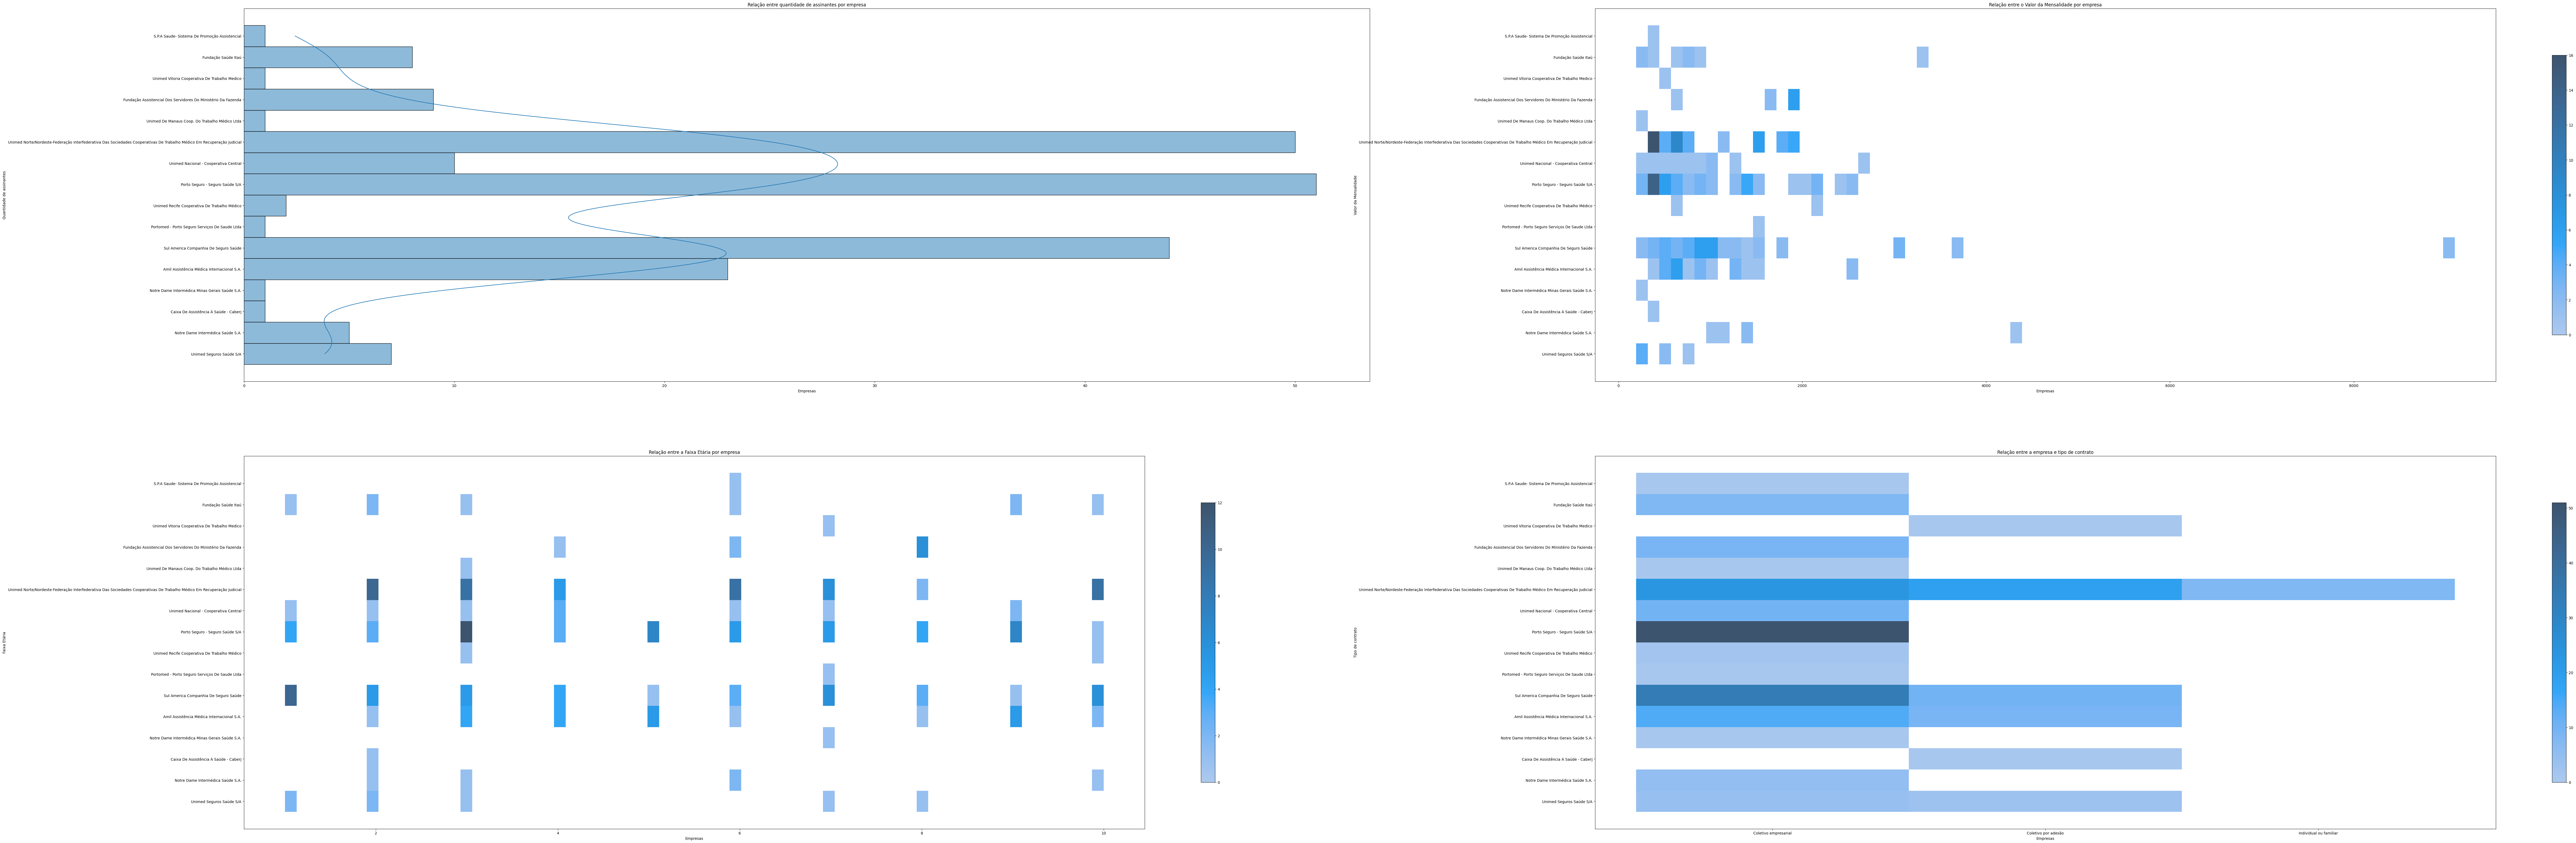

In [76]:
plt.figure(figsize=(120, 40))
plt.subplot(2, 2, 1)
sns.histplot(y=tabela_merge_caractaristicas['RAZAO_SOCIAL'], bins=20, kde=True)
plt.title('Relação entre quantidade de assinantes por empresa')
plt.xlabel('Empresas')
plt.ylabel('Quantidade de assinantes')
plt.subplot(2, 2, 2)
sns.histplot(y='RAZAO_SOCIAL', x='VCM', data=tabela_merge_caractaristicas, bins=70, kde=True, cbar=True, cbar_kws=dict(shrink=.75))
plt.title('Relação entre o Valor da Mensalidade por empresa')
plt.xlabel('Empresas')
plt.ylabel('Valor da Mensalidade')
plt.subplot(2, 2, 3)
sns.histplot(y='RAZAO_SOCIAL', x='CD_FAIXA_ETARIA', data=tabela_merge_caractaristicas, bins=70, kde=True, cbar=True, cbar_kws=dict(shrink=.75))
plt.title('Relação entre a Faixa Etária por empresa')
plt.xlabel('Empresas')
plt.ylabel('Faixa Etária')
plt.subplot(2, 2, 4)
sns.histplot(y='RAZAO_SOCIAL', x='CONTRATACAO', data=tabela_merge_caractaristicas, bins=70, kde=True, cbar=True, cbar_kws=dict(shrink=.75))
plt.title('Relação entre a empresa e tipo de contrato')
plt.xlabel('Empresas')
plt.ylabel('Tipo de contrato')
print(f"""Município analisado: {municipio_escolhido} - {estado_escolhido} - {regiao_escolhida}
Planos ID entre {minimo} e {maximo}""")

In [69]:
empresa = tabela_merge_caractaristicas['RAZAO_SOCIAL'].unique()

print('Escolha uma empresa para analisar')
for e in empresa:
    print(e)
    

Escolha uma empresa para analisar
S.P.A Saude- Sistema De Promoção Assistencial
Fundação Saúde Itaú
Unimed Vitoria Cooperativa De Trabalho Medico
Fundação Assistencial Dos Servidores Do Ministério Da Fazenda
Unimed De Manaus Coop. Do Trabalho Médico Ltda
Unimed Norte/Nordeste-Federação Interfederativa Das Sociedades Cooperativas De Trabalho Médico Em Recuperação Judicial
Unimed Nacional - Cooperativa Central
Porto Seguro - Seguro Saúde S/A
Unimed Recife Cooperativa De Trabalho Médico
Portomed - Porto Seguro Serviços De Saude Ltda
Sul America Companhia De Seguro Saúde
Amil Assistência Médica Internacional S.A.
Notre Dame Intermédica Minas Gerais Saúde S.A.
Caixa De Assistência À Saúde - Caberj
Notre Dame Intermédica Saúde S.A.
Unimed Seguros Saúde S/A


In [70]:
empresa_escolhida = 'Porto Seguro - Seguro Saúde S/A'
tabela_fitrado_empresa = tabela_merge_caractaristicas[tabela_merge_caractaristicas['RAZAO_SOCIAL'] == empresa_escolhida]

tabela_fitrado_empresa

,ID_PLANO,CD_FAIXA_ETARIA,VCM,NM_PLANO,RAZAO_SOCIAL,GR_MODALIDADE,PORTE_OPERADORA,CONTRATACAO,SGMT_ASSISTENCIAL,ABRANGENCIA_COBERTURA,FATOR_MODERADOR,ACOMODACAO_HOSPITALAR,LIVRE_ESCOLHA
35,16163449,3,485.29,OURO VI PME,Porto Seguro - Seguro Saúde S/A,Seguradora,Grande,Coletivo empresarial,Ambulatorial + Hospitalar com obstetrícia,Nacional,Coparticipacão,Individual,Parcial com internação
36,16163449,3,485.29,OURO VI PME,Porto Seguro - Seguro Saúde S/A,Seguradora,Grande,Coletivo empresarial,Ambulatorial + Hospitalar com obstetrícia,Nacional,Coparticipacão,Individual,Parcial com internação
39,16192433,3,360.65,OURO PORTO II,Porto Seguro - Seguro Saúde S/A,Seguradora,Grande,Coletivo empresarial,Ambulatorial + Hospitalar com obstetrícia,Nacional,Coparticipacão,Individual,Parcial com internação
40,16192463,3,373.86,OURO PORTO V,Porto Seguro - Seguro Saúde S/A,Seguradora,Grande,Coletivo empresarial,Ambulatorial + Hospitalar com obstetrícia,Nacional,Coparticipacão,Individual,Parcial com internação
41,16198241,1,934.82,DIAMANTE A XIV PME,Porto Seguro - Seguro Saúde S/A,Seguradora,Grande,Coletivo empresarial,Ambulatorial + Hospitalar com obstetrícia,Nacional,Coparticipacão,Individual,Parcial com internação
...,...,...,...,...,...,...,...,...,...,...,...,...,...
84,16200139,9,746.17,BRONZE III EMPRESARIAL,Porto Seguro - Seguro Saúde S/A,Seguradora,Grande,Coletivo empresarial,Ambulatorial + Hospitalar com obstetrícia,Nacional,Ausente,Individual,Parcial com internação
182,16655811,3,403.58,PRATA V PME,Porto Seguro - Seguro Saúde S/A,Seguradora,Grande,Coletivo empresarial,Ambulatorial + Hospitalar com obstetrícia,Nacional,Coparticipacão,Individual,Parcial com internação
183,16655821,6,647.45,OURO V PME,Porto Seguro - Seguro Saúde S/A,Seguradora,Grande,Coletivo empresarial,Ambulatorial + Hospitalar com obstetrícia,Nacional,Coparticipacão,Individual,Parcial com internação
184,16655831,8,952.23,OURO IX PME,Porto Seguro - Seguro Saúde S/A,Seguradora,Grande,Coletivo empresarial,Ambulatorial + Hospitalar com obstetrícia,Nacional,Coparticipacão,Individual,Parcial com internação


Município analisado: Santa Rita do Sapucaí - MG - Sudeste
Planos ID entre 15000000.0 e 17500000.0
Empresa escolhida: Porto Seguro - Seguro Saúde S/A


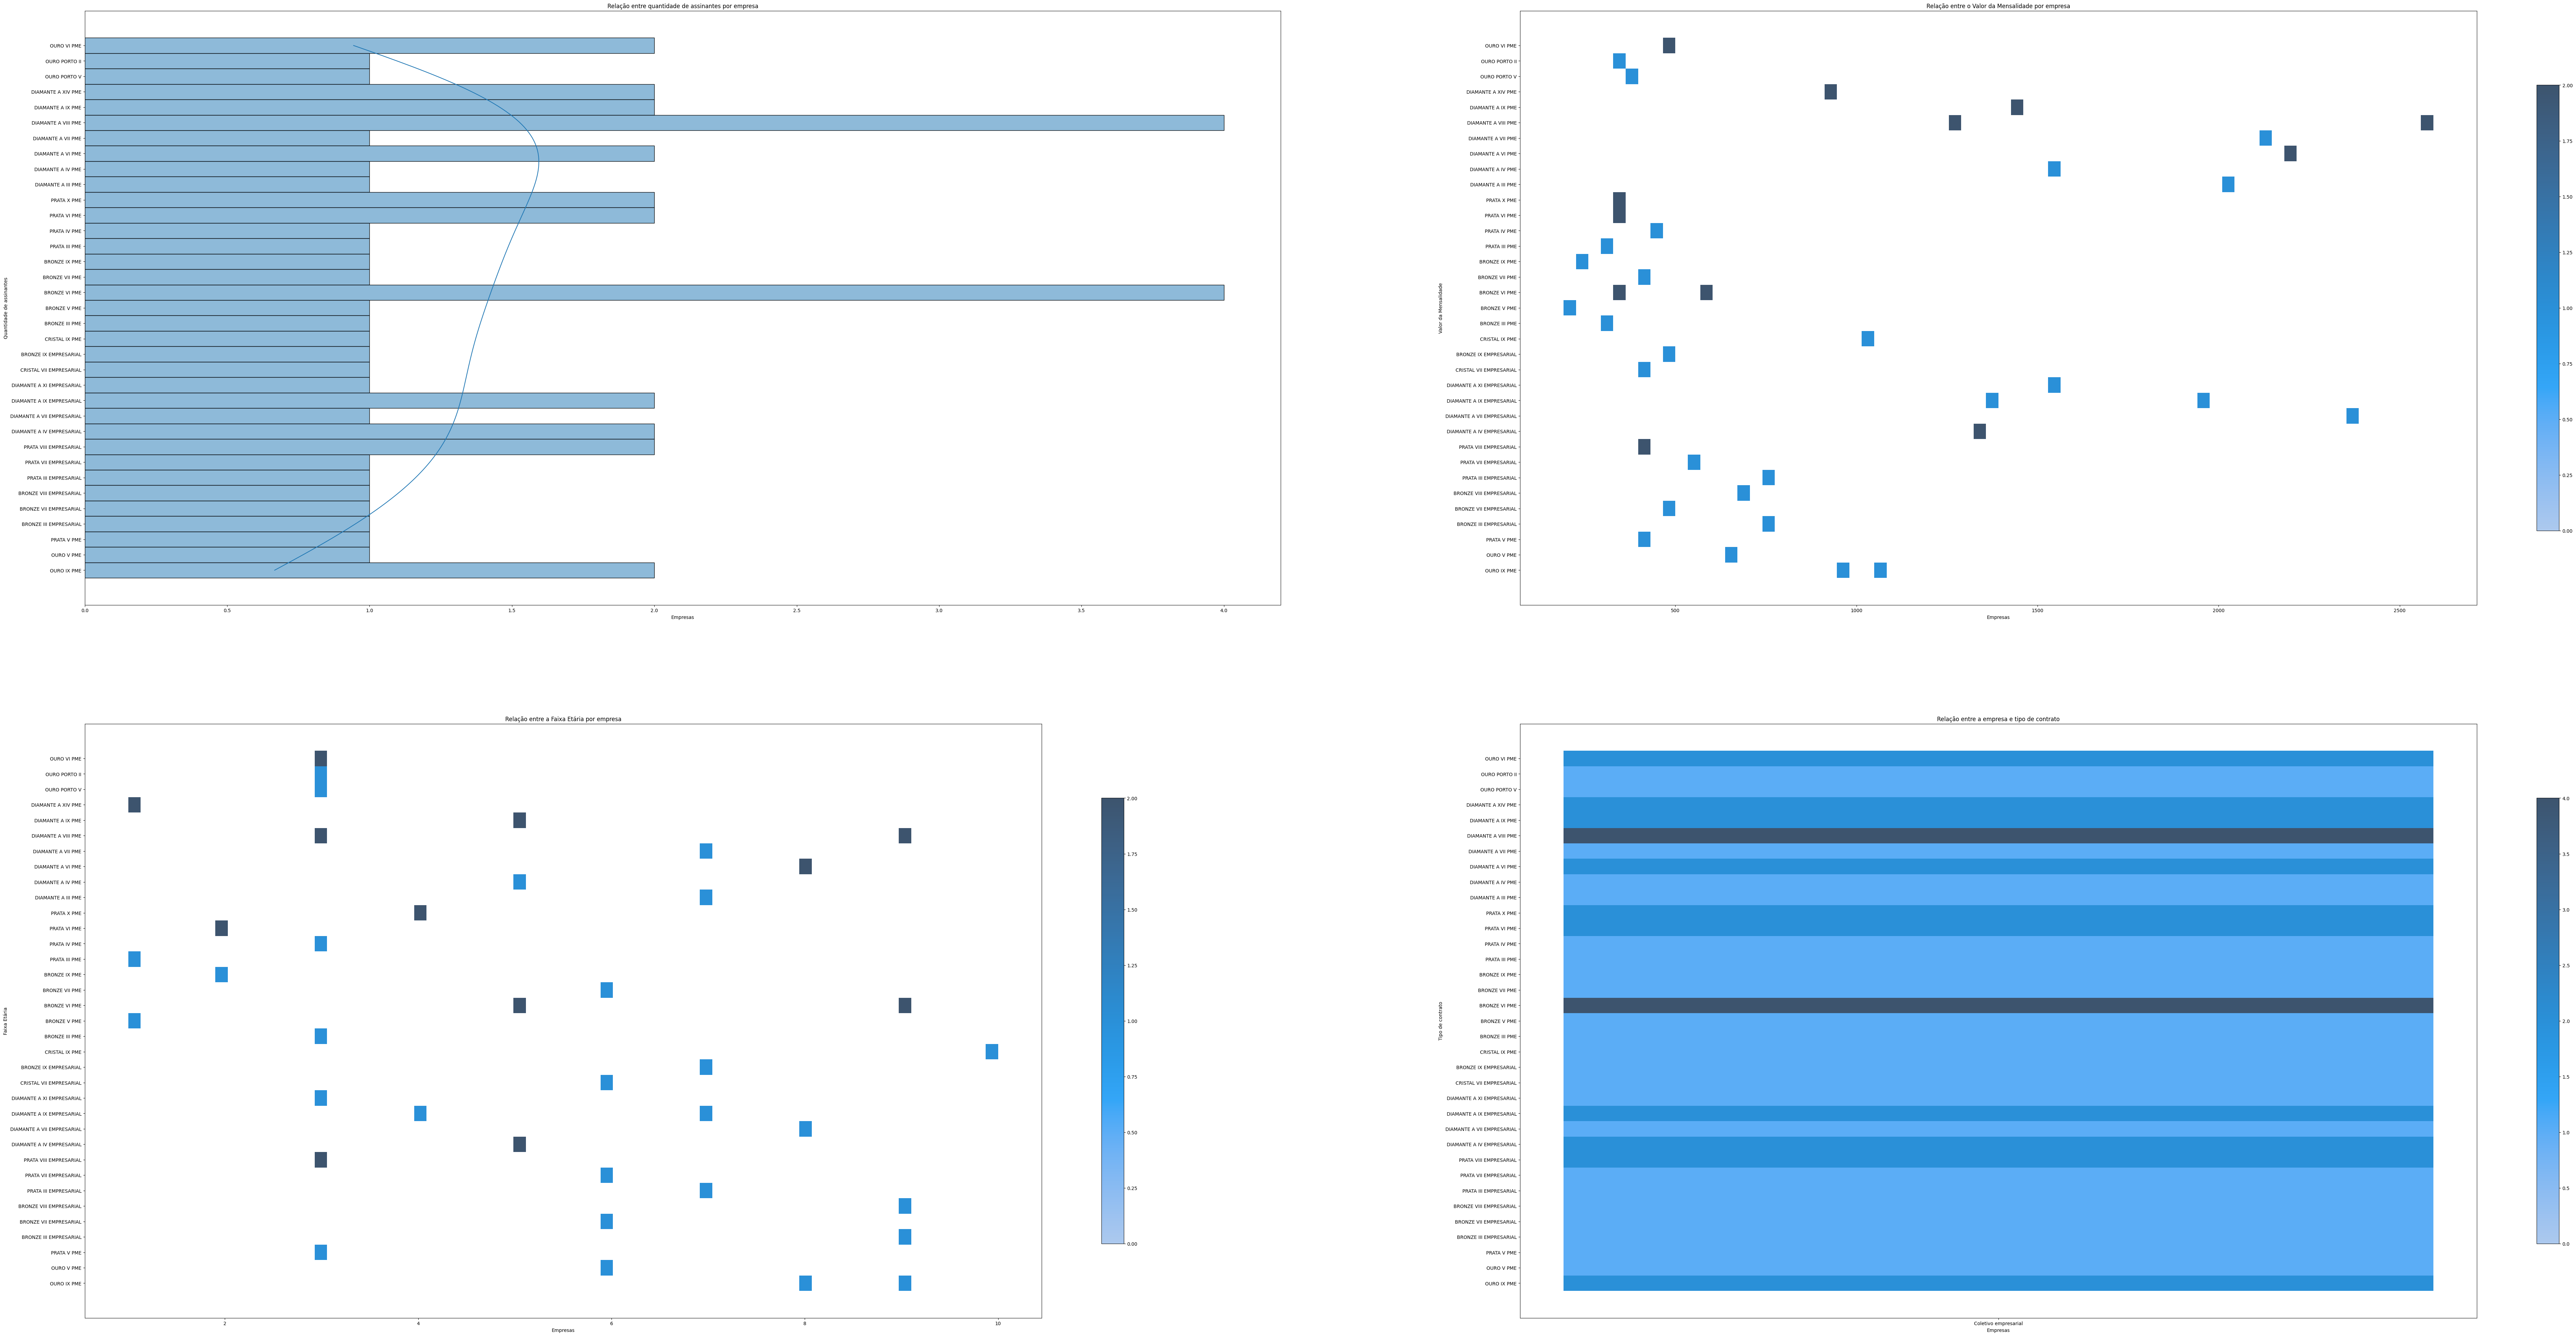

In [75]:
plt.figure(figsize=(100, 50))
plt.subplot(2, 2, 1)
sns.histplot(y=tabela_fitrado_empresa['NM_PLANO'], bins=20, kde=True)
plt.title('Relação entre quantidade de assinantes por empresa')
plt.xlabel('Empresas')
plt.ylabel('Quantidade de assinantes')
plt.subplot(2, 2, 2)
sns.histplot(y='NM_PLANO', x='VCM', data=tabela_fitrado_empresa, bins=70, kde=True, cbar=True, cbar_kws=dict(shrink=.75))
plt.title('Relação entre o Valor da Mensalidade por empresa')
plt.xlabel('Empresas')
plt.ylabel('Valor da Mensalidade')
plt.subplot(2, 2, 3)
sns.histplot(y='NM_PLANO', x='CD_FAIXA_ETARIA', data=tabela_fitrado_empresa, bins=70, kde=True, cbar=True, cbar_kws=dict(shrink=.75))
plt.title('Relação entre a Faixa Etária por empresa')
plt.xlabel('Empresas')
plt.ylabel('Faixa Etária')
plt.subplot(2, 2, 4)
sns.histplot(y='NM_PLANO', x='CONTRATACAO', data=tabela_fitrado_empresa, bins=70, kde=True, cbar=True, cbar_kws=dict(shrink=.75))
plt.title('Relação entre a empresa e tipo de contrato')
plt.xlabel('Empresas')
plt.ylabel('Tipo de contrato')
print(f"""Município analisado: {municipio_escolhido} - {estado_escolhido} - {regiao_escolhida}
Planos ID entre {minimo} e {maximo}
Empresa escolhida: {empresa_escolhida}""")